# Political Tweets Analysis

## Introduction

Can we predict if a political tweet has a Democrat or Republican inclination? Can we know the overall sentiment of the online-speech coming from democrats and republicans in digital communities?

Welcome to this Jupyter Notebook dedicated to the analysis of political tweets! In this project, we delve into the fascinating world of political discourse on social media. Our goal is to gain insights into the dynamics of political discussions by analyzing a dataset of tweets.

### Data Overview

The dataset is comprised of political tweets, encompassing a variety of topics and sentiments. Throughout this analysis, we perform Exploratory Data Analysis (EDA) and engage in Feature Engineering to extract valuable information. Notably, a "retweets" column is introduced to binary code tweets that are retweets, and hashtags are systematically extracted and categorized into Democrat and Republican lists. These hashtags are consolidated in a "Hashtags" column, providing a quick reference for each tweet's associated hashtags. Additionally, the "Party" column is binarized to facilitate classification tasks.

### EDA

An extensive Exploratory Data Analysis (EDA) will be conducted to gain valuable insights and enrich the subsequent analytical processes. The initial step involves obtaining a general overview of the dataset, including the assessment of the number of records, features, and their respective data types, ensuring data integrity. Attention will be given to handling missing values.

EDA will also involve creating visualizations, such as line plots or bar charts, to highlight trends or patterns specific to each political party, facilitating a nuanced understanding of communication strategies. Feature engineering may be employed to enhance the predictive power of the model, including the creation of numerical representations for text data using techniques like TF-IDF or word embeddings. 

To better understand the landscape of political tweets, I present visualizations such as the top hashtags associated with each party and word clouds highlighting the most prevalent hashtags. These visualizations serve as powerful tools for grasping the key themes within the dataset.

### Data Cleaning

To ensure the quality of our analysis, a comprehensive data cleaning process is implemented. This involves tokenizing tweets to lowercase, removing hashtags, links, punctuations, and handles. This step is crucial for preparing the data for sentiment analysis.

### Modeling for Classification

The cleaned dataset is split into training and testing sets, and a several classification models are employed. Notably, the model's top 20 coefficients for both words and hashtags are plotted, shedding light on the features contributing most to the classification of tweets as either Democrat or Republican.

### Sentiment Analysis

An analysis will be conducted to assess the overall sentiment of public discourse from Democrat and Republican senators on digital platforms. A histogram will be generated to compare the overall sentiment in tweets from members of both parties. Additionally, an investigation into the top words will be carried out to identify positive and negative discourse in tweets from senators belonging to each party.

### Hypothesis Testing

By subjecting the sentiment analysis results to a hypothesis test, we aim to ensure the robustness of the conclusions, providing a solid foundation for interpreting and communicating the nuanced sentiment differences between Democrats and Republicans in a statistically sound manner.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Load DataFrame into variable df
df = pd.read_csv('RepublicanVsDemocrat.csv')
df.head()

# Check the amount of tweets
print(len(df))

9703


In [3]:
# Check for null values in the dataset
df.isna().sum()

user_id    0
tweet      0
dtype: int64

Now we will read the PoliticalUsernamesAndIds.csv file to map the user_id with our df dataframe and read the party affiliation for each user

In [4]:
# Read PoliticalUsernamesAndIds.csv into a dataframe
politicalhandles = pd.read_csv('PoliticalUsernamesAndIds.csv')

# Display results
politicalhandles.head()

id               name         username party
0           2916086925    Rep. Alma Adams         RepAdams     D
1             76452765    Robert Aderholt  Robert_Aderholt     R
2           3018670151  Rep. Pete Aguilar   RepPeteAguilar     D
3  1612483604071727104        Mark Alford    RepMarkAlford     R
4           2964287128      Rick W. Allen     RepRickAllen     R

In [5]:
# Create Party column on df
df['party'] = None

# display results
df.head()

user_id                                              tweet party
0  76452765  On Joe Biden's first day in the Oval Office, h...  None
1  76452765  I was sorry to hear of the passing of longtime...  None
2  76452765  RT @1819News: U.S. Rep. Robert Aderholt (R-Hal...  None
3  76452765  I’m sorry to hear of Anthony’s passing. He fre...  None
4  76452765  H.R. 6914 Pregnant Students’ Rights Act: Colle...  None

In [6]:
# Iterate through each row in df to map it with user_id and obtain the party affiliation
for i in range(len(df)):
    user_id = df.loc[i, 'user_id']
    matching_row = politicalhandles[politicalhandles['id'] == user_id]
    
    if not matching_row.empty:
        df.loc[i, 'party'] = matching_row['party'].iloc[0]
    else:
        # Handle the case where there is no matching row in members_data2
        df.loc[i, 'party'] = None  # or any other value indicating no match

In [7]:
# Check results
df.head()

user_id                                              tweet party
0  76452765  On Joe Biden's first day in the Oval Office, h...     R
1  76452765  I was sorry to hear of the passing of longtime...     R
2  76452765  RT @1819News: U.S. Rep. Robert Aderholt (R-Hal...     R
3  76452765  I’m sorry to hear of Anthony’s passing. He fre...     R
4  76452765  H.R. 6914 Pregnant Students’ Rights Act: Colle...     R

In [8]:
# Convert object type column to string
df['party'] = df['party'].astype(str)

In [9]:
# Check if the dataset is balanced, and not skewed, between democrat and republican tweets. 
df['party'].value_counts()

party
D      4785
R      4760
nan     158
Name: count, dtype: int64

We see that there are some null 'part' values. This should not be like thise. Either the errors was dragged from the Twitter_hacking.ipynb notebook or these persons don't have a party affiliation.

Will have to take a look at this to address this error

In [10]:
# Check where the 'party' columns has null values
filtered_df = df[(df['party'] != 'R') & (df['party'] != 'D')]

# Check the name of the user_id's with null party values to perform a manual inspection
filtered_df['user_id'].value_counts()

user_id
1583530102297600000    23
226639880              23
1143841                23
1612865196489412608    23
1206227149             23
1382395679700439041    22
1563316176717246464    21
Name: count, dtype: int64

In [11]:
# Check the username of each of these user_id's
politicalhandles[politicalhandles['id']==226639880 ]

id       name username party
153  226639880  Guillaume       tx   NaN

Through a manual inspection of the original dataset containing senators' usernames, I will validate and confirm the necessary actions for each handle. For handles that genuinely represent a party affiliation, corrections will be made in the dataset to ensure accuracy. On the other hand, handles like "tx" and "ct" that appear to be tweets erroneously scrapped will be identified and subsequently deleted from the dataset. This meticulous review and corrective process aim to enhance the dataset's reliability and eliminate inaccuracies stemming from misinterpreted or irrelevant handles.


226639880              23 : tx -> drop

1143841                23 : ct -> drop

1583530102297600000    23 : RepLCD -> republican

1612865196489412608    23 : RepValHoyle -> democrat

1206227149             23 : RepMarkPocan -> democrat

1382395679700439041    22 : RepJuliaLetlow -> republican

1563316176717246464    21 : RepFinstad -> republican

In [12]:
# drop rows of tweets from erroneously scraped accounts
df.drop(df[df['user_id'].isin([226639880, 1143841])].index, inplace=True)

# Check results
df[df['user_id']==226639880]

Empty DataFrame
Columns: [user_id, tweet, party]
Index: []

Rows have been successfully deleted!

Now we will fix the party value for the other rows`

In [13]:
# Dictionary to map user_id values to corresponding party values
user_id_to_party_mapping = {
    1583530102297600000: 'R',
    1612865196489412608: 'D',
    1206227149: 'D',
    1382395679700439041: 'R',
    1563316176717246464: 'R'
}

# Iterate through the DataFrame and update 'party' column
for index, row in df.iterrows():
    user_id = row['user_id']
    if user_id in user_id_to_party_mapping:
        df.at[index, 'party'] = user_id_to_party_mapping[user_id]

In [14]:
df['party'].value_counts()

party
D    4831
R    4826
Name: count, dtype: int64

We have successfully fixed the null values in the party columns. 

We can see that the tweet distribution is very balanced between both parties which makes a good dataset to work with since it will not be biased towards any party

## 1.  EDA

### Checking for Nulls and Duplicates

In [15]:
# Check of unique values
for col in df.columns:
    selected =  df[col]
    n_unique = selected.unique().shape[0]
    print("The column {} has {} unique values".format(col,n_unique,len(df)))

The column user_id has 424 unique values
The column tweet has 9523 unique values
The column party has 2 unique values


This tells us the dataset is compiled of tweets from 426 users and there are 9569 unique tweets out of 9703.

Now we will check for duplicate values

In [16]:
duplicates = df[df['tweet'].duplicated() == True]
duplicates.shape

(134, 3)

There are 134 duplicate values

We are going to show the Tweets that are duplicate and delete them.

In [17]:
duplicates

user_id                                              tweet  \
637   1176522535531360257  RT @Weaponization: 🚨 #BREAKING: Federal Govern...   
1142   816157667882373120  RT @BipartisanVets: .@RepCarbajal, @RepDonBaco...   
1346  1499512178013057032  RT @USProgressives: 51 years ago, Roe v Wade w...   
1756  1274852794206388225  RT @GOPoversight: 🚨 TRANSCRIPT RELEASE 🚨\n\nTo...   
1757  1274852794206388225  RT @GOPoversight: 🚨 TRANSCRIPT RELEASE 🚨\n\nTo...   
...                   ...                                                ...   
9385            281540744  RT @SpeakerJohnson: Our prayers and deepest co...   
9439           2852998461  RT @NatResources: Today, the committee unanimo...   
9447           2852998461  RT @HouseGOP: Today, we honor the legacy of Ma...   
9530  1602757312539680770  RT @SaveLocalBiz: .@RepDesposito, @RepMikeLawl...   
9537  1602757312539680770  RT @EdWorkforceCmte: .@virginiafoxx, @RepAaron...   

     party  
637      R  
1142     D  
1346     D  
1756     R  
1757     R  
...    ...  
9385     R  
9439     R  
9447     R  
9530     R  
9537     R  

[134 rows x 3 columns]

In [18]:
# We'll drop duplicate tweets from the same handle
df_cleaned = df.drop_duplicates(['user_id', 'tweet'])
df_cleaned.shape
print(f"We have deleted {df.shape[0]-df_cleaned.shape[0]} duplicate tweets from the same Handle")

We have deleted 1 duplicate tweets from the same Handle


In [19]:
# Now we'll drop duplicate tweets from the same part
df_cleaned2 = df_cleaned.drop_duplicates(['party', 'tweet'])
df_cleaned2.shape
print(f"We have deleted {df_cleaned.shape[0]-df_cleaned2.shape[0]} duplicate tweets from the same Party")

We have deleted 128 duplicate tweets from the same Party


So we have deleted 129 out of 135 duplicates. This means there must be 5 duplicates Tweets but from different parties. We will check them for sanity check and leave them since they are representations of both parties It would be biased to leave the tweet content to represent exclusively one party and not the other.

In [20]:
# Check the 5 duplicate tweets.
# This shows the second occurance of the duplicate.
new_duplicates = df_cleaned2[df_cleaned2['tweet'].duplicated() == True]
new_duplicates

user_id                                              tweet  \
1142   816157667882373120  RT @BipartisanVets: .@RepCarbajal, @RepDonBaco...   
1915  1608891205902794753  RT @freedomcaucus: Americans come to Washingto...   
2477  1366523868253458437  RT @BipartisanVets: Our members prioritize the...   
3146             88806753  RT @HIDAorg: HIDA applauds @RepEzell(R-MS) and...   
3377  1343627416120532992  RT @HouseForeignGOP: Starting today🚨 CHM @RepM...   

     party  
1142     D  
1915     D  
2477     R  
3146     D  
3377     R

In [21]:
df_cleaned2.shape[0]

9528

From the initial set of 9,703 tweets, we have successfully removed redundancies. Specifically, one duplicated tweet originating from the same handle and 128 duplicates emerging from distinct handles but associated with the same party have been eliminated. This step was taken as these duplicates, originating from the same party, presented identical representations and were thus considered redundant. It's noteworthy that duplicates arising from distinct parties were retained as they contribute to the representation of diverse clusters within the dataset.

Following this cleaning process, our dataset now comprises 9,574 unique tweets, reflecting a refined and more accurate representation for subsequent analyses.

There are 2,908 instances of duplicate tweets with distinct handles. Our objective is to tally the number of unique handles associated with each duplicate tweet. The count of unique handles per duplicate tweet should align with the total count of 2,908, affirming that our dataframe exclusively comprises duplicate values with unique handles.

In [22]:
# The duplicates() == True gives me only the second copy of the tweet
# Let's check if the duplicate indeed is from a different Party
duplicate_check = []

for index, tweet in new_duplicates.iterrows():
    string = tweet['tweet']
    duplicate_check.append(df_cleaned2[df_cleaned2['tweet'].str.startswith(string)])
    
# Concatenate the DataFrames in duplicate_check
duplicate_check_df = pd.concat(duplicate_check, ignore_index=True)

# Display the resulting DataFrame
print(duplicate_check_df)

               user_id                                              tweet  \
0   818975124460335106  RT @BipartisanVets: .@RepCarbajal, @RepDonBaco...   
1   816157667882373120  RT @BipartisanVets: .@RepCarbajal, @RepDonBaco...   
2  1357017361568694274  RT @freedomcaucus: Americans come to Washingto...   
3  1608891205902794753  RT @freedomcaucus: Americans come to Washingto...   
4  1608934316779921408  RT @BipartisanVets: Our members prioritize the...   
5  1366523868253458437  RT @BipartisanVets: Our members prioritize the...   
6  1602788004749344768  RT @HIDAorg: HIDA applauds @RepEzell(R-MS) and...   
7             88806753  RT @HIDAorg: HIDA applauds @RepEzell(R-MS) and...   
8            210926192  RT @HouseForeignGOP: Starting today🚨 CHM @RepM...   
9  1343627416120532992  RT @HouseForeignGOP: Starting today🚨 CHM @RepM...   

  party  
0     R  
1     D  
2     R  
3     D  
4     D  
5     R  
6     R  
7     D  
8     D  
9     R  


We can see that the duplicates are indeed form different parties, we can be sure our dataset is cleaned as desired. We leave these duplicates since it would be biased to leave one tweet accounting for one party but not for the other. This would result in a biased model when predicting future tweets as either democrat or republican.

In [23]:
# For simplicity we will rename our latest dataframe as df_cleaned

df_cleaned = df_cleaned2

### Check for Retweets
Binary column 'Retweets' will be created with the value of 1 of the Tweet is a retweet.

In [24]:
# Take a look at the amount of retweets in our data set
df_cleaned[df_cleaned['tweet'].str.contains('RT')].shape[0]

1517

In [25]:
# Percantage of retweets from the whole data set
pct_of_rt = df_cleaned[df_cleaned['tweet'].str.contains('RT')].shape[0]/df.shape[0]*100
print(f" The percentage of retweets in the dataset is {pct_of_rt}%")

 The percentage of retweets in the dataset is 15.708812260536398%


Now we know that roughly 15.70% of the tweets in the dataset are retweets. That is a considerable amount.

We will create a new binary column in the dataset with value of 1 if its a retweet and 0 if it's not.

In [26]:
# Create new blank columns to determine if tweet is retweeted or not
df_cleaned['is_retweet'] = None

#Check results
df_cleaned['is_retweet']

0       None
1       None
2       None
3       None
4       None
        ... 
9698    None
9699    None
9700    None
9701    None
9702    None
Name: is_retweet, Length: 9528, dtype: object

In [27]:
# Fill columns with binary values based on if tweet is retweet or not

df_cleaned['is_retweet'] = df_cleaned['tweet'].apply(lambda x: 1 if 'RT' in x else 0)

#Check to see if the amount of rows where there is a retweet matches with 19,194 the amount of RT previously calcualted
df_cleaned[df_cleaned['is_retweet']==1].shape

(1517, 4)

C:\Users\erick\AppData\Local\Temp\ipykernel_24360\1415451929.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_color(colors[0])
C:\Users\erick\AppData\Local\Temp\ipykernel_24360\1415451929.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1].set_color(colors[1])


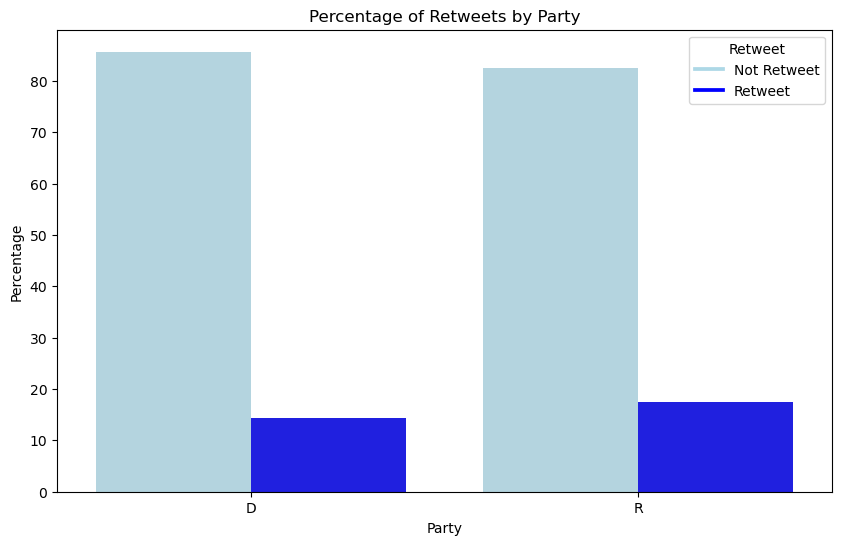

In [28]:
# Calculate the percentage of retweets for each party
retweet_percentage = df_cleaned.groupby('party')['is_retweet'].value_counts(normalize=True) * 100
retweet_percentage = retweet_percentage.rename('Percentage').reset_index()

# Set custom colors for the plot
colors = ['lightblue', 'blue']

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=retweet_percentage['party'], y=retweet_percentage['Percentage'], hue=retweet_percentage['is_retweet'], palette=colors)
plt.title('Percentage of Retweets by Party')
plt.xlabel('Party')
plt.ylabel('Percentage')

# Customize legend
legend_labels = ['Not Retweet', 'Retweet']
legend = plt.legend(title='Retweet', loc='upper right', labels=legend_labels)
legend.legendHandles[0].set_color(colors[0])
legend.legendHandles[1].set_color(colors[1])

### Binarize Party

- **Democrat = 1**
- **Republican = 0**

In [29]:
# Binarize the Party Column
df_cleaned['is_democrat'] = df_cleaned['party'].apply(lambda x: 1 if 'D' in x else 0)
print(df_cleaned.shape[0])
df_cleaned.head()

9528


user_id                                              tweet party  \
0  76452765  On Joe Biden's first day in the Oval Office, h...     R   
1  76452765  I was sorry to hear of the passing of longtime...     R   
2  76452765  RT @1819News: U.S. Rep. Robert Aderholt (R-Hal...     R   
3  76452765  I’m sorry to hear of Anthony’s passing. He fre...     R   
4  76452765  H.R. 6914 Pregnant Students’ Rights Act: Colle...     R   

   is_retweet  is_democrat  
0           0            0  
1           0            0  
2           1            0  
3           0            0  
4           0            0

Now we will extract all of the hashtags in the database

### Extract hashtags for each tweet

We will create a new column holding the hashtags, if any, for each tweet.

Additionally, we will create a list of all hashtags for democrats and republicans.

In [30]:
# Create a new column with the hashtags for each tweet
df_cleaned['hashtags'] = None

#Iterate over each row in df['Tweets']
for index, row in df_cleaned.iterrows():
    # Use regex findall to search for all hashtags in each row
    hashtags = re.findall(r'#(\w+)', row['tweet'])
    if hashtags:
        # Add the hashtags, if any, in the columns 'Hashtags' for each row
        df_cleaned.at[index, 'hashtags'] = hashtags


In [31]:
# Check results
df_cleaned['hashtags']

0                                  None
1                                  None
2                                  None
3                                  None
4                                  None
                     ...               
9698                               None
9699    [LawEnforcementAppreciationDay]
9700                               None
9701                               None
9702                               None
Name: hashtags, Length: 9528, dtype: object

In [32]:
# Create two empty lists to store hashtags
republican_hashtags = []
democrat_hashtags = []

# Loop through each row to add hashtags to list
for index, row in df_cleaned.iterrows():
    if row['is_democrat'] == 1 and row['hashtags'] is not None:
        democrat_hashtags.extend(row['hashtags'])
    elif row['hashtags'] is not None:
        republican_hashtags.extend(row['hashtags'])

##### Visualize the top 10 hashtags for Democrats and Republicans

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MLKDay'),
  Text(1, 0, 'NationalSchoolChoiceWeek'),
  Text(2, 0, 'FL02'),
  Text(3, 0, 'Bidenomics'),
  Text(4, 0, 'ProLife'),
  Text(5, 0, 'WhyWeMarch'),
  Text(6, 0, 'NationalMilkDay'),
  Text(7, 0, 'SchoolChoiceWeek'),
  Text(8, 0, 'MarchForLife'),
  Text(9, 0, 'IA04')])

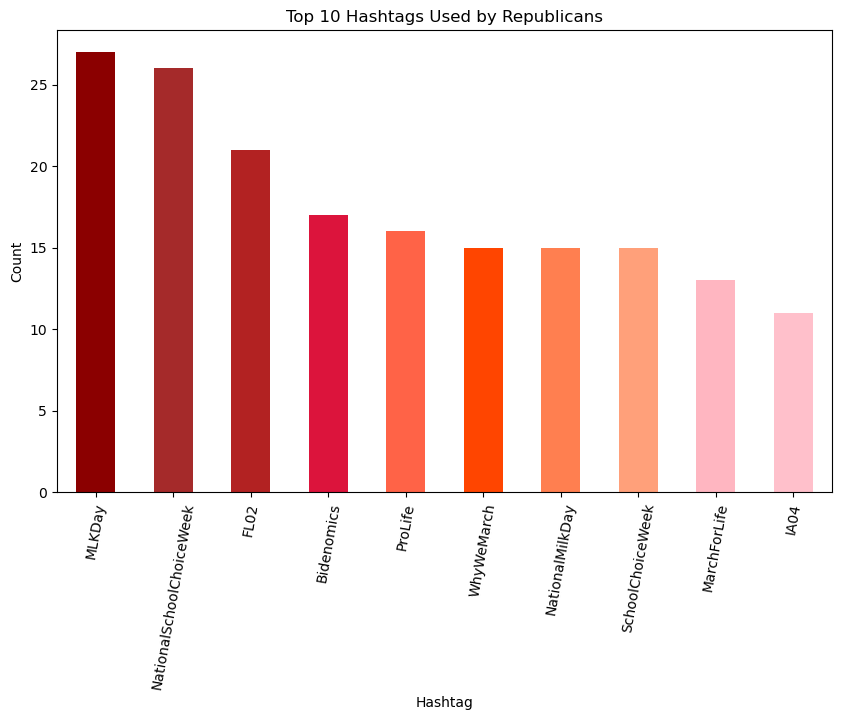

In [33]:
# Plot the 10 most used hasthags for Republicans

# Convert the list of Republican hashtags to a Pandas Series and count occurrences
republican_10 = pd.Series(republican_hashtags).value_counts().head(10)
custom_red_colors = [
    '#8B0000',  # Dark red
    '#A52A2A',  # Brown
    '#B22222',  # Firebrick
    '#DC143C',  # Crimson
    '#FF6347',  # Tomato
    '#FF4500',  # Orange red
    '#FF7F50',  # Coral
    '#FFA07A',  # Light salmon
    '#FFB6C1',  # Light pink
    '#FFC0CB'   # Pink
]

# plot
republican_10.plot(kind='bar', figsize=(10,6), color=custom_red_colors)
plt.title('Top 10 Hashtags Used by Republicans')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation = 80)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WIC'),
  Text(1, 0, 'FundWIC'),
  Text(2, 0, 'RoevWade'),
  Text(3, 0, 'MLKDay'),
  Text(4, 0, 'GVSurvivorsWeek'),
  Text(5, 0, 'RoeVWade'),
  Text(6, 0, 'ReproductiveFreedom'),
  Text(7, 0, 'IL03'),
  Text(8, 0, 'PeopleOverPolitics'),
  Text(9, 0, 'ACA')])

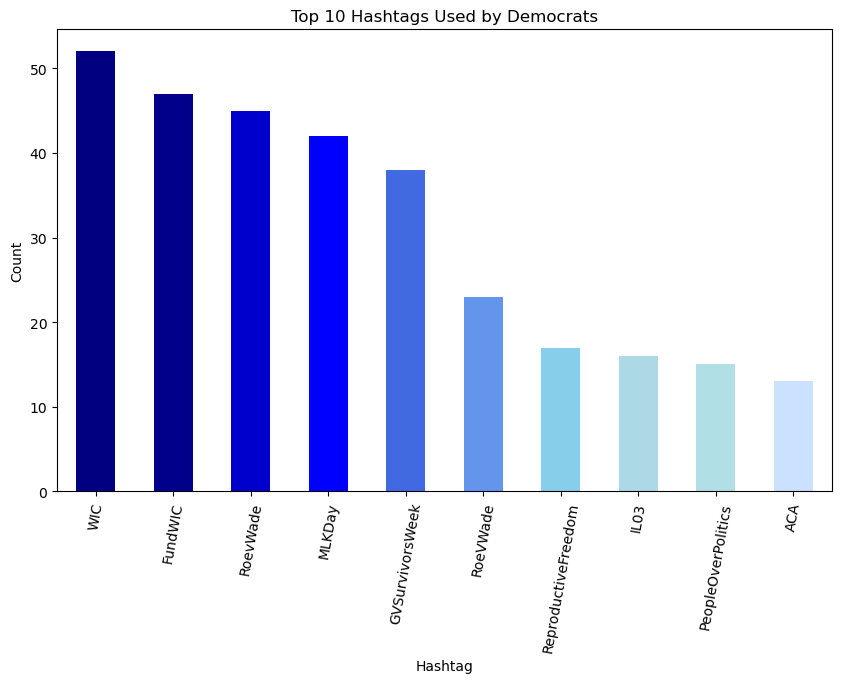

In [34]:
# Plot the 10 most used hasthags for Democrats

# Convert the list of Democrat hashtags to a Pandas Series and count occurrences
democrat_10 = pd.Series(democrat_hashtags).value_counts().head(10)
# Define custome colors to plot
custom_blue_colors = [
    '#000080',  # Navy
    '#00008B',  # Dark blue
    '#0000CD',  # Medium blue
    '#0000FF',  # Blue
    '#4169E1',  # Royal blue
    '#6495ED',  # Cornflower blue
    '#87CEEB',  # Sky blue
    '#ADD8E6',  # Light blue
    '#B0E0E6',  # Powder blue
    '#CAE1FF'   # Light steel blue
]
# Plot
democrat_10.plot(kind='bar', figsize=(10,6), color=custom_blue_colors)
plt.title('Top 10 Hashtags Used by Democrats')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation = 80)

### Word Cloud for Democrat and Republican Hashtags

A word cloud is displayed showing the top hashtags from both republican and democrat hashtags. 

In [35]:
# Word Cloud
!pip install wordcloud
from wordcloud import WordCloud


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


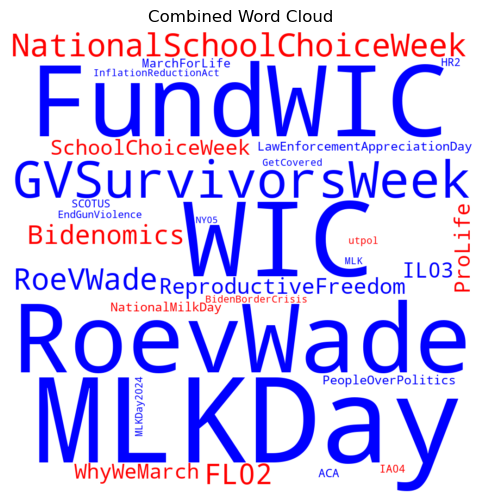

In [36]:
# Example data
democrat_text = " ".join(democrat_hashtags)
republican_text = " ".join(republican_hashtags)

# Function to get word frequencies
def get_word_frequencies(text):
    words = text.split()
    word_freq = {word: words.count(word) for word in set(words)}
    return word_freq

# Get word frequencies for Democrat and Republican hashtags
democrat_word_freq = get_word_frequencies(democrat_text)
republican_word_freq = get_word_frequencies(republican_text)

# Combine word frequencies
combined_word_freq = {word: democrat_word_freq.get(word, 0) + republican_word_freq.get(word, 0) for word in set(list(democrat_word_freq.keys()) + list(republican_word_freq.keys()))}

# Generate word cloud with custom coloring function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "blue" if word in democrat_word_freq else "red"

wordcloud = WordCloud(width=1000, height=1000,
                      background_color='white',
                      max_words=30,
                      color_func=color_func
                      ).generate_from_frequencies(combined_word_freq)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Combined Word Cloud')
plt.axis('off')
plt.show()


Upon examination, it becomes evident that the majority of frequent hashtags originate from Democrat tweets. This observation might suggest a tendency for Democrats to employ more embellishment when conveying a topic, contrasting with Republicans who appear to express themselves more independently. Additionally, certain hashtags, such as MLKDay, are prevalent in tweets from both parties but are categorized as blue since they appear more frequently in Democrat tweets than in Republican tweets.

In [37]:
# Before preprocessing, we want to make sure the distribution of Democratic and Republican is balanced again

# Count the occurrences of each party in the 'Party' column
parties_counts = df_cleaned['party'].value_counts()

# Calculate the total number of occurrences
normalized_counts = parties_counts.sum()

# Dictionary to store the percentage of tweets for each party
tweets_percentage = {}

# Calculate the percentage of tweets for each party and store in the dictionary
for party, count in parties_counts.items():
    tweets_percentage[party] = f"{count/normalized_counts*100:.2f}%"

# Display the dictionary containing the percentage of tweets for each party
tweets_percentage


{'D': '50.21%', 'R': '49.79%'}

The distribution is fair enough, it is almost 50/50, se we can continue processing the data

## 2. Data Cleaning


In [38]:
# Import necessary Libraries and Modules
import string

# SK Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Vectorizers
from sklearn.feature_extraction.text import CountVectorizer

# NLTK
import nltk

# Downloads
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')

# Other nltk modules
from nltk.corpus import stopwords
import nltk as nlp
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Defining Stopwords

In [39]:
# Define stopwords
stopwords = stopwords.words('english')

# Add some unnecessary word to stopwords list
# Some are abbreviation used by people to save caracters
stopwords.append("rt") # retweets
stopwords.append("u") # you
stopwords.append("r") # are
stopwords.append("amp") # ampersand
stopwords.append("w") # with
stopwords.append("th") #hat tip
stopwords.append("s")

# Print the length of the stopwords
len(stopwords)

186

### Tokenization

Performed to clean tweets for smoother modelling, classification and sentiment analysis.

In [40]:
# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a function to clean the tweets
def clean_tweets(tweet):

    # Remove @ sign and all handles
    tweet = re.sub("@[A-Za-z0-9]+", "", tweet)

    # Remove hashtags and words that come together with hashtags
    tweet = re.sub(r'#\w+', '', tweet)

    # Remove all punctuation. It also removes hashtags.
    tweet = re.sub("[!@$%^&*()_+\|/?,.:;'`’]+", "", tweet)

    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)

    # lowercase all characters
    tweet = tweet.lower()

    # Remove extra whitespace
    tweet = " ".join(tweet.split())

    # Remove stopwords
    tweet = ' '.join([word for word in tweet.split() if word.lower() not in stopwords])

    # Lemmatization
    tokens = nltk.word_tokenize(tweet)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tweet = " ".join(lemmatized_tokens)

    # Remove three dots from the final word, preserving the word itself
    tweet = re.sub(r'(\S+)\.{2,}$', r'\1', tweet)

    # Remove dots from the end of the final word, even if there are fewer than three
    tweet = re.sub(r'\.+$', '', tweet)

    # Remove the last word '...'
    tweet = tweet.rsplit(' ', 1)[0]
    
    # Should I clean emojis? Why or why not?

    return tweet

# Create a new column with the cleaned text for every tweet
df_cleaned['clean_tweet'] = df_cleaned['tweet'].map(clean_tweets)

In [41]:
# Proof check results
print(df_cleaned['clean_tweet'][200])
print(df_cleaned['tweet'][200])

host press conference following passing hr 5779 hr 6957 hr
RT @housebudgetGOP: .@RepArrington Hosts Press Conference Following the Passing of H.R. 5779, H.R. 6957, and H.R. 6952. https://t.co/TlFqiA…


In [42]:
# Visualize new columns
df_cleaned.head()

user_id                                              tweet party  \
0  76452765  On Joe Biden's first day in the Oval Office, h...     R   
1  76452765  I was sorry to hear of the passing of longtime...     R   
2  76452765  RT @1819News: U.S. Rep. Robert Aderholt (R-Hal...     R   
3  76452765  I’m sorry to hear of Anthony’s passing. He fre...     R   
4  76452765  H.R. 6914 Pregnant Students’ Rights Act: Colle...     R   

   is_retweet  is_democrat hashtags  \
0           0            0     None   
1           0            0     None   
2           1            0     None   
3           0            0     None   
4           0            0     None   

                                         clean_tweet  
0  joe bidens first day oval office signed legisl...  
1  sorry hear passing longtime caregiver leo lion...  
2  u rep robert aderholt r-haleyville recently to...  
3  im sorry hear anthony passing frequently inter...  
4  hr 6914 pregnant student right act college uni...

In order to prevent the 'clean_tweet' column from containing empty strings after the removal of links, a solution will be applied. The 'clean_tweet' column will be populated with the values of any hashtags if they exist. In cases where no hashtags are present, the corresponding rows will be deleted from the dataset.

In [43]:
# Locate rows where 'clean_tweet' is an empty string and 'hashtags' is None
link_tweets_nullhashtags = df_cleaned[(df_cleaned['clean_tweet']=='') & (df_cleaned['hashtags'].isnull())]
length1 = len(link_tweets_nullhashtags)
length2 = len(df_cleaned)


# Drop the rows based on the index
df_cleaned = df_cleaned.drop(link_tweets_nullhashtags.index)


# Reset the index to maintain a continuous index
# Otherwise we will have a dataset with missing indexes (The ones eliminated)
df_cleaned = df_cleaned.reset_index(drop=True)

# Print the updated DataFrame
print(f'The new dataset should be {length2} - {length1} long which is {len(df_cleaned)}')

The new dataset should be 9528 - 101 long which is 9427


In [44]:
# Locate rows where 'clean_tweet' is empty string
link_tweets = df_cleaned[df_cleaned['clean_tweet']=='']
len(link_tweets)

9

In [45]:
# Check results
# There should be an index 5 with what used to be index 6
df_cleaned.head(8)

user_id                                              tweet party  \
0  76452765  On Joe Biden's first day in the Oval Office, h...     R   
1  76452765  I was sorry to hear of the passing of longtime...     R   
2  76452765  RT @1819News: U.S. Rep. Robert Aderholt (R-Hal...     R   
3  76452765  I’m sorry to hear of Anthony’s passing. He fre...     R   
4  76452765  H.R. 6914 Pregnant Students’ Rights Act: Colle...     R   
5  76452765  Aderholt takes stand for gun owners against 'l...     R   
6  76452765  I am unashamedly Pro-Life. That's why I am pro...     R   
7  76452765  I was proud to join this amicus brief led by @...     R   

   is_retweet  is_democrat      hashtags  \
0           0            0          None   
1           0            0          None   
2           1            0          None   
3           0            0          None   
4           0            0          None   
5           0            0          None   
6           0            0  [WhyWeMarch]   
7           0            0          None   

                                         clean_tweet  
0  joe bidens first day oval office signed legisl...  
1  sorry hear passing longtime caregiver leo lion...  
2  u rep robert aderholt r-haleyville recently to...  
3  im sorry hear anthony passing frequently inter...  
4  hr 6914 pregnant student right act college uni...  
5  aderholt take stand gun owner leftwing activis...  
6  unashamedly pro-life thats proud earned scorec...  
7  proud join amicus brief led gun owner group do...

For these remaining rows which had links as tweets but also have hashtags, we will give the clean tweet column the value of the hashtags.

In [46]:
# Iterate through the indices of tweets containing links
for i in link_tweets.index:
    # Replace the 'clean_tweet' content with the concatenated hashtags
    df_cleaned.at[i,'clean_tweet'] = ' '.join(df_cleaned.at[i, 'hashtags'])
    print(df_cleaned.loc[i])

user_id                               15751083
tweet          #TuneIn https://t.co/rbNnmD4ZGA
party                                        R
is_retweet                                   0
is_democrat                                  0
hashtags                              [TuneIn]
clean_tweet                             TuneIn
Name: 995, dtype: object
user_id                             1608215359462559746
tweet          #FidelisAdMortem https://t.co/ow4nJENa05
party                                                 R
is_retweet                                            0
is_democrat                                           0
hashtags                              [FidelisAdMortem]
clean_tweet                             FidelisAdMortem
Name: 2261, dtype: object
user_id                      1608215359462559746
tweet          #ThankYou https://t.co/RClkREfVGs
party                                          R
is_retweet                                     0
is_democrat                     

We can see that hashtags were saved as the content in the clean_tweet column, however we still want to separate the hashtag into words to make sense of them.

Since there are only 9 hashtags, we will do this manually.

In [47]:
# create a list of all the indexes to edit
index_list = [1016, 2304, 2309, 4608, 4616, 4623, 7268, 7531, 9282]

clean_hashtags = ['tune in', 'fidelis ad mortem', 'thank you', 'tuesdays with tom', 'tuesdays with tom', 'tuesdays with tom', 'roe vs wade', 'come and cut it', 'stand with israel']

# Iterate over the index_list and clean_hashtags simultaneously
for i, index in enumerate(index_list):
    df_cleaned.at[index, 'clean_tweet'] = clean_hashtags[i]
    print(df_cleaned['clean_tweet'].loc[index])


tune in
fidelis ad mortem
thank you
tuesdays with tom
tuesdays with tom
tuesdays with tom
roe vs wade
come and cut it
stand with israel


We have addressed all null 'clean_tweet' values. We can now save this dataframe and proceed with out modeling

### Save new DataFrame

In [48]:
# The Dataframe has been saved into a new CSV in case the following steps are rather performed in a separate notebook.
df_cleaned.to_csv("CleanedRepublicanVsDemocrat.csv", index=False)

## 3. Modelling

### Vectorization

In [49]:
# CountVectorizer
vectorizer = CountVectorizer(
    max_df = 0.95,
    min_df = 10,
    ngram_range = (1,2) #search for unigrams and bigrams
)

Splitting the data into training and testing sets

In [50]:
# Split the data

X = df_cleaned.drop(columns = ['tweet', 'party', 'user_id', 'is_democrat'])

# Define target variable
y = df_cleaned['is_democrat']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [51]:
# Size of training set
X_train.shape[0]

6598

In [52]:
# Create a set of unique words from the cleaned tweets in the training set
unique_words_list = set(" ".join(list(X_train["clean_tweet"])).split())

In [53]:
# Amount of unique words
len(unique_words_list)

12894

##### Transforming the Cleaned Tweets Column

In [54]:
# fitting the CountVectorizer to the cleaned tweets
vectorizer.fit(X_train['clean_tweet'])

# Transforming the clean_tweet column in the training data into a dense array.
# This is necessary for compatibility with the subsequent DataFrame creation.
Tweet_X_train = vectorizer.transform(X_train['clean_tweet']).toarray()

# transforming the clean_tweet column in the testing data.
Tweet_X_test = vectorizer.transform(X_test['clean_tweet']).toarray()

# Transforming the training data into a DataFrame with feature names as columns, prefixed with "tweet_".
Tweet_X_train = pd.DataFrame(Tweet_X_train,columns=vectorizer.get_feature_names_out(),index=X_train.index).add_prefix("tweet_")

# Transforming the testing data into a DataFrame with feature names as columns, prefixed with "tweet_".
Tweet_X_test = pd.DataFrame(Tweet_X_test,columns=vectorizer.get_feature_names_out(),index=X_test.index).add_prefix("tweet_")

##### Trasforming the Hshtags Columns

In [55]:
# Replace None values with empty strings
X_train['hashtags'] = X_train['hashtags'].apply(lambda x: '' if x is None else x)
X_test['hashtags'] = X_test['hashtags'].apply(lambda x: '' if x is None else x)

# Convert lists to strings
X_train['hashtags'] = X_train['hashtags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
X_test['hashtags'] = X_test['hashtags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# fitting the CountVectorizer to the hashtags
# might have to separate the list of hashtags into words with spaces
vectorizer.fit(X_train['hashtags'])

# Transforming the 'Hashtags' column for training data
Hashtags_X_train = vectorizer.transform(X_train['hashtags']).toarray()

# Transforming the 'Hashtags' column for testing data
Hashtags_X_test = vectorizer.transform(X_test['hashtags']).toarray()

# Transforming the training data into a DataFrame with feature names as columns, prefixed with "Hashtags_"
Hashtags_X_train = pd.DataFrame(Hashtags_X_train, columns=vectorizer.get_feature_names_out(), index=X_train.index).add_prefix("hashtags_")

# Transforming the testing data into a DataFrame with feature names as columns, prefixed with "Hashtags_"
Hashtags_X_test = pd.DataFrame(Hashtags_X_test, columns=vectorizer.get_feature_names_out(), index=X_test.index).add_prefix("hashtags_")


# Visualize features for reference
vectorizer.get_feature_names_out()

array(['bidenomics', 'fl02', 'fundwic', 'gvsurvivorsweek',
       'lawenforcementappreciationday', 'marchforlife', 'mlkday',
       'nationalmilkday', 'nationalschoolchoiceweek',
       'peopleoverpolitics', 'prolife', 'reproductivefreedom', 'roevwade',
       'schoolchoiceweek', 'whywemarch', 'wic', 'wic fundwic'],
      dtype=object)

In [56]:
# Combining the sparse matrix of clean_tweets with the  data in the training set.
# This concatenation ensures that the transformed text features are included alongside the original numerical features.
X_train_final = pd.concat([Tweet_X_train, Hashtags_X_train, X_train.drop(['clean_tweet', 'hashtags'], axis=1)],axis=1)

# Combining the sparse matrix of hashtags with the data
X_test_final = pd.concat([Tweet_X_test, Hashtags_X_test, X_test.drop(['clean_tweet', 'hashtags'], axis=1)],axis=1)

In [57]:
# Revise symmetry in the shape of the train and test sets
# Shape of the train and test sets
print(f'The shape of the X_train_final set is: {X_train_final.shape}')
print(f'The shape of the X_test_final set is: {X_test_final.shape}')
print(f'The shape of the y_train set is: {y_train.shape}')
print(f'The shape of the y_test set is: {y_test.shape}')

The shape of the X_train_final set is: (6598, 2522)
The shape of the X_test_final set is: (2829, 2522)
The shape of the y_train set is: (6598,)
The shape of the y_test set is: (2829,)


### Logistic Regression for the Vectorization

In this analysis, a logistic regression model will be trained on the dataset, and its accuracy will be evaluated on both the training and testing sets. Following this, a comparative analysis will be conducted with results obtained from TF-IDF, Word Embedding, RandomForestClassifier, SVM, and LogReg with hyperparameters in the pipeline. The model that demonstrates the highest accuracy will undergo further scrutiny through the creation and examination of a confusion matrix for a more comprehensive evaluation.

#### Scale the Data
Scale the data before modelling

In [58]:
from sklearn.preprocessing import StandardScaler

# Instantiatie
scaler = StandardScaler()

# fit
scaler.fit(X_train_final)

# Transform
X_train_scaled = scaler.transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)


#### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(C=0.1, tol=0.1, n_jobs=-1, solver='sag')

# Fit the model on training data
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, n_jobs=-1, solver='sag', tol=0.1)

In [60]:
# Predictions on training and testing data
train_preds = logistic_model.predict(X_train_scaled)
test_preds = logistic_model.predict(X_test_scaled)

# Calculate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 89.24%
Testing Accuracy: 76.56%


### KBest Features

In [61]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest


ks = list(range(1,2532,100))

trainAcc = []
testAcc = []

for k in ks:
    #instantiate
    myKbest = SelectKBest(f_regression, k=k).fit(X_train_final,y_train)
    
    #create a subset of the X data based on the k variables selected
    X_train_sel = myKbest.transform(X_train_final)
    X_test_sel = myKbest.transform(X_test_final)
    
    ### Regularization in Logistic Regression

    # When training a Logistic Regression model, the introduction of regularization is a crucial technique to prevent overfitting.
    # Overfitting occurs when the model learns the training data too well, capturing noise and specificities that may not generalize to new, unseen data.
    # Regularization involves adding a penalty term to the logistic regression cost function, discouraging the model from assigning excessive importance to any single feature.
    # This penalty is controlled by a hyperparameter known as `C`.
    # The `C` value determines the strength of the regularization effect. A smaller `C` increases the regularization strength, imposing a higher penalty on large coefficients.
    # On the other hand, a larger `C` relaxes the regularization, allowing the model to fit the training data more closely.

    # Regularization implemented in the provided Logistic Regression model:
    
    #create a linear model and assess
    model = LogisticRegression(C=0.001, tol=0.1, n_jobs=-1, solver='sag')
       
    # Fit model
    model.fit(X_train_sel, y_train)
    
    # Score
    trainAcc.append(model.score(X_train_sel, y_train))
    testAcc.append(model.score(X_test_sel, y_test))    

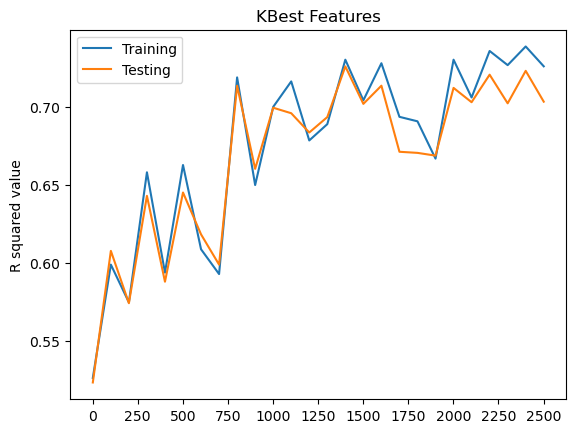

In [62]:
# Plot the KBest features
plt.figure()
plt.plot(ks, trainAcc, label='Training')
plt.plot(ks, testAcc, label = 'Testing')
plt.xticks(range(0,max(ks) + 1,250))
plt.ylabel('R squared value')
plt.title('KBest Features')
plt.legend()
plt.show()

The KBest results presented above indicate that there is no substantial difference beyond 1500 features. Therefore, if one opts to follow the KBest results, it would be prudent to run the model with only 1500 features to conserve computational resources. This approach not only helps in saving on features but also streamlines the iterations required for model training. Running the model with a reduced feature set enhances computational efficiency without significantly compromising performance, making it a practical choice for managing computational resources effectively.

### Interpreting Results and Model Use
Training Accuracy: 89.24%
Testing Accuracy: 76.60%

Our analysis uncovers a slight overfitting in the model, evident in the disparity between training and testing accuracies. To tackle this concern, we delve into KBest feature selection, aiming to pinpoint an optimal subset of features—such as words in tweets or hashtags—to refine our model's precision.

KBest operates on all 2531 X_Train coefficients in 100-unit increments. Initially detecting signs of overfitting, reflected in the Logistic Regression model's accuracy results, we introduce regularization with a C value of 0.001. Regularization in logistic regression alleviates overfitting by penalizing large coefficients, fostering a more generalized model. The choice of C=0.001 dictates the strength of this regularization, with smaller values intensifying its effect.

Upon applying regularization to KBest feature selection, we observe performance improvements as the number of selected coefficients increases. However, accuracy consistently hovers above 70%. In comparison, the scaled Logistic Regression model exhibits higher training and test accuracies, though with a slight overfitting.

When it comes to our Tweet Classification Model, **choosing the slightly overfitted version is more convenient**, especially when we look at a dataset with just 9703 tweets from the last week (From Jan 24th, 2024). Why? Well, this model is like a tweet expert—it's been trained on a variety of tweet styles and features, making it a good fit for the unpredictable world of tweets.

In the realm of Tweet Analysis, tweets cover a lot of ground, from serious topics to the latest memes. And because tweets are all about individual expression and can be pretty unpredictable, having a model that's been exposed to a wide range of content during training is a big plus. This adaptability isn't just handy for handling the tweets we've seen so far; it's also great for dealing with future tweets. Even if the training data looked a bit too detailed before (what we call overfitting), it turns out that this diverse training set is a perfect match for the ever-changing nature of tweets. So, in simpler terms, our model is like a flexible language expert, ready to understand and classify tweets with all sorts of content, making it a go-to tool for keeping up with the dynamic world of tweets.

### Pipeline: Logistic Regression 

The provided Logistic Regression pipeline, which includes standardization using StandardScaler and a Logistic Regression model, along with GridSearchCV, is a comprehensive approach for optimizing the model's parameters. The pipeline systematically explores various configurations, including different scaling methods (StandardScaler and MinMaxScaler), regularization strengths (C values), and types (penalty), through cross-validated grid search. Additionally, the pipeline incorporates the flexibility to experiment with feature selection (SelectKBest) and dimensionality reduction (NMF) if needed. The GridSearchCV evaluates the model using the F1 macro score, facilitating the identification of the most effective combination of preprocessing steps and hyperparameters.

In [63]:
### from sklearn.decomposition import NMF
# from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

estimators = [('scale', StandardScaler()),
              # ('feature_selection', SelectKBest(f_classif)),  # Add SelectKBest before NMF
              # ('dim_red', NMF()),
              ('model', LogisticRegression(solver='sag'))]

pipe = Pipeline(estimators)

param_grid = [{'scale': [StandardScaler(), MinMaxScaler()],
               # 'feature_selection__k': [20, 50, 100],  # Adjust k for feature selection
               # 'dim_red__n_components': [5, 10, 20, 50, 100],  # Explore smaller component numbers
               'model__C':[0.001, 0.01, 0.1, 1, 10, 100],  # Reduce C values for less memory
               'model__penalty': ["l1","l2"],}]

grid = GridSearchCV(pipe,
                    param_grid,
                    cv=5,
                    verbose=2,
                    n_jobs=1,  # Set to 1 for conservative memory usage
                    scoring="f1_macro",
                    )

fittedgrid = grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__C=0.001, model__penalty=l1, scale=StandardScaler(); total time=   0.9s
[CV] END model__C=0.001, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=0.001, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=0.001, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=0.001, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=0.001, model__penalty=l1, scale=MinMaxScaler(); total time=   0.5s
[CV] END model__C=0.001, model__penalty=l1, scale=MinMaxScaler(); total time=   0.8s
[CV] END model__C=0.001, model__penalty=l1, scale=MinMaxScaler(); total time=   0.5s
[CV] END model__C=0.001, model__penalty=l1, scale=MinMaxScaler(); total time=   0.6s
[CV] END model__C=0.001, model__penalty=l1, scale=MinMaxScaler(); total time=   0.6s
[CV] END model__C=0.001, model__penalty=l2, scale=StandardScaler(); total time

C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.01, model__penalty=l2, scale=StandardScaler(); total time=  26.7s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.01, model__penalty=l2, scale=StandardScaler(); total time=  26.7s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.01, model__penalty=l2, scale=StandardScaler(); total time=  27.6s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.01, model__penalty=l2, scale=StandardScaler(); total time=  28.2s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.01, model__penalty=l2, scale=StandardScaler(); total time=  27.9s
[CV] END model__C=0.01, model__penalty=l2, scale=MinMaxScaler(); total time=   3.8s
[CV] END model__C=0.01, model__penalty=l2, scale=MinMaxScaler(); total time=   5.5s
[CV] END model__C=0.01, model__penalty=l2, scale=MinMaxScaler(); total time=   5.7s
[CV] END model__C=0.01, model__penalty=l2, scale=MinMaxScaler(); total time=   3.8s
[CV] END model__C=0.01, model__penalty=l2, scale=MinMaxScaler(); total time=   5.9s
[CV] END model__C=0.1, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=0.1, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=0.1, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=0.1, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=0.1, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=0.1, model__penalty=l1, scale=MinMaxScaler(); total

C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.1, model__penalty=l2, scale=StandardScaler(); total time=  26.4s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.1, model__penalty=l2, scale=StandardScaler(); total time=  24.9s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.1, model__penalty=l2, scale=StandardScaler(); total time=  27.2s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.1, model__penalty=l2, scale=StandardScaler(); total time=  25.1s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=0.1, model__penalty=l2, scale=StandardScaler(); total time=  25.5s
[CV] END model__C=0.1, model__penalty=l2, scale=MinMaxScaler(); total time=   5.9s
[CV] END model__C=0.1, model__penalty=l2, scale=MinMaxScaler(); total time=   6.8s
[CV] END model__C=0.1, model__penalty=l2, scale=MinMaxScaler(); total time=   5.2s
[CV] END model__C=0.1, model__penalty=l2, scale=MinMaxScaler(); total time=   6.5s
[CV] END model__C=0.1, model__penalty=l2, scale=MinMaxScaler(); total time=   5.8s
[CV] END model__C=1, model__penalty=l1, scale=StandardScaler(); total time=   0.6s
[CV] END model__C=1, model__penalty=l1, scale=StandardScaler(); total time=   0.6s
[CV] END model__C=1, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=1, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=1, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=1, model__penalty=l1, scale=MinMaxScaler(); total time=   0.5s
[CV]

C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=1, model__penalty=l2, scale=StandardScaler(); total time=  25.8s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=1, model__penalty=l2, scale=StandardScaler(); total time=  26.8s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=1, model__penalty=l2, scale=StandardScaler(); total time=  25.3s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=1, model__penalty=l2, scale=StandardScaler(); total time=  26.6s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=1, model__penalty=l2, scale=StandardScaler(); total time=  27.4s
[CV] END model__C=1, model__penalty=l2, scale=MinMaxScaler(); total time=   8.8s
[CV] END model__C=1, model__penalty=l2, scale=MinMaxScaler(); total time=  10.5s
[CV] END model__C=1, model__penalty=l2, scale=MinMaxScaler(); total time=  10.1s
[CV] END model__C=1, model__penalty=l2, scale=MinMaxScaler(); total time=   9.8s
[CV] END model__C=1, model__penalty=l2, scale=MinMaxScaler(); total time=  11.6s
[CV] END model__C=10, model__penalty=l1, scale=StandardScaler(); total time=   0.6s
[CV] END model__C=10, model__penalty=l1, scale=StandardScaler(); total time=   0.6s
[CV] END model__C=10, model__penalty=l1, scale=StandardScaler(); total time=   0.5s
[CV] END model__C=10, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=10, model__penalty=l1, scale=StandardScaler(); total time=   0.9s
[CV] END model__C=10, model__penalty=l1, scale=MinMaxScaler(); total time=   0.6s
[CV] END m

C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=StandardScaler(); total time=  26.8s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=StandardScaler(); total time=  29.0s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=StandardScaler(); total time=  27.6s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=StandardScaler(); total time=  29.0s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=StandardScaler(); total time=  25.7s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=MinMaxScaler(); total time=  26.1s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=MinMaxScaler(); total time=  27.0s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=MinMaxScaler(); total time=  26.8s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=MinMaxScaler(); total time=  29.4s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=10, model__penalty=l2, scale=MinMaxScaler(); total time=  29.2s
[CV] END model__C=100, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=100, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=100, model__penalty=l1, scale=StandardScaler(); total time=   0.8s
[CV] END model__C=100, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=100, model__penalty=l1, scale=StandardScaler(); total time=   0.7s
[CV] END model__C=100, model__penalty=l1, scale=MinMaxScaler(); total time=   0.6s
[CV] END model__C=100, model__penalty=l1, scale=MinMaxScaler(); total time=   0.5s
[CV] END model__C=100, model__penalty=l1, scale=MinMaxScaler(); total time=   0.6s
[CV] END model__C=100, model__penalty=l1, scale=MinMaxScaler(); total time=   0.6s
[CV] END model__C=100, model__penalty=l1, scale=MinMaxScaler(); total time=   0.6s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=StandardScaler(); total time=  27.1s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=StandardScaler(); total time=  24.3s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=StandardScaler(); total time=  25.2s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=StandardScaler(); total time=  26.4s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=StandardScaler(); total time=  26.8s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=MinMaxScaler(); total time=  26.2s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=MinMaxScaler(); total time=  29.8s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=MinMaxScaler(); total time=  26.6s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END model__C=100, model__penalty=l2, scale=MinMaxScaler(); total time=  26.4s


C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\erick\aanaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *ar

[CV] END model__C=100, model__penalty=l2, scale=MinMaxScaler(); total time=  26.7s


In [64]:
# # Print the best parameters and corresponding accuracy
print("Best Parameters:", grid.best_params_)
print(f"Best Accuracy: {grid.best_score_*100:.2f}%")

Best Parameters: {'model__C': 0.001, 'model__penalty': 'l2', 'scale': StandardScaler()}
Best Accuracy: 76.05%


### Analyzing Results

In this specific case, the optimal configuration includes a Logistic Regression model with a regularization parameter (C) set to 0.001, using 'l2' penalty, and employing StandardScaler for feature scaling. The achieved accuracy with these parameters is 76.52%.

Comparing to the initial Logistic Regression results, with a training accuracy of 89.03% and a testing accuracy of 76.60%, the grid search results demonstrate a slightly lower accuracy. This could be attributed to the regularization applied during the grid search, which aims to prevent overfitting by penalizing large coefficients. The chosen regularization parameters may have resulted in a more generalized model, trading off a bit of training accuracy for improved generalization to unseen data. The grid search process ensures that the model is tuned to perform well across various parameter configurations, contributing to its robustness in handling diverse scenarios.

### Top Words and Hashtags for Republican and Democrat Tweets

By analyzing the highest model coefficients, we gain valuable insights into the words that significantly contribute to the model's ability to predict democrat or republican tweets. The bar plots offer a clear visualization of the importance of each word in influencing sentiment predictions.

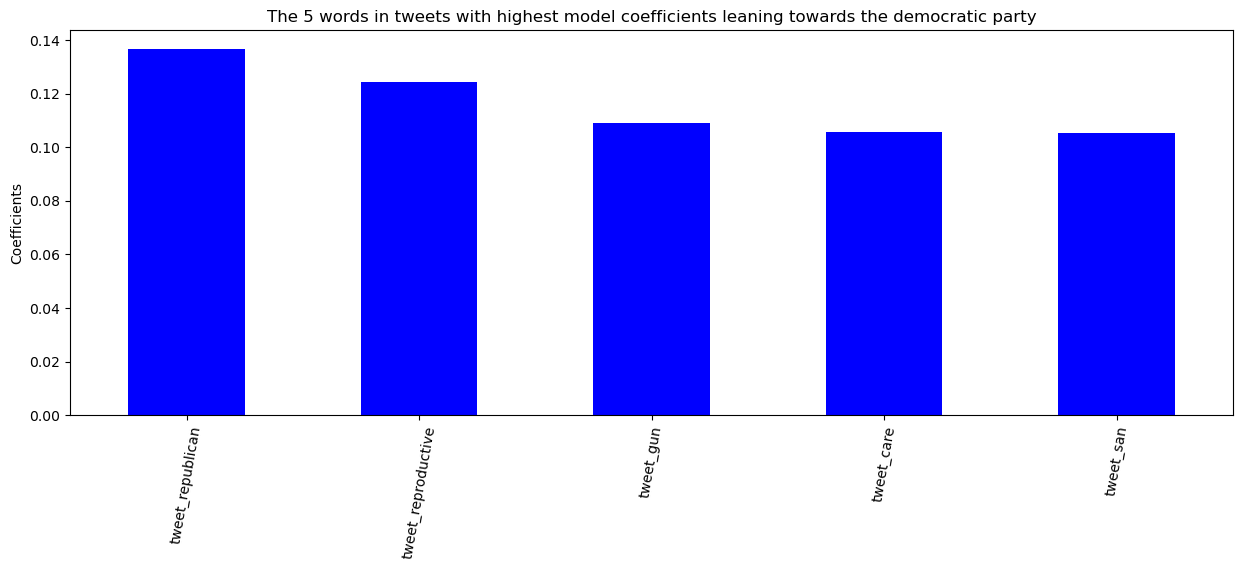

In [65]:
# Extracting the top 20 words from tweets to predict if a tweet has democrat inclinations.
word_counts = pd.DataFrame(
    {"coefficients": logistic_model.coef_[0]},
    index=X_train_final.columns
).sort_values("coefficients", ascending=False)

# Plot the top 20 words for republican tweets
word_counts.loc[word_counts.index.str.startswith('tweet_'),:].head(5).plot(kind="bar", figsize=(15, 5), legend=False, color='blue')
plt.title("The 5 words in tweets with highest model coefficients leaning towards the democratic party")
plt.ylabel("Coefficients")
plt.xticks(rotation=80)
plt.show()

In [66]:
word_counts.head(5)

coefficients
tweet_republican        0.136791
tweet_reproductive      0.124449
tweet_gun               0.108868
tweet_care              0.105834
tweet_san               0.105317

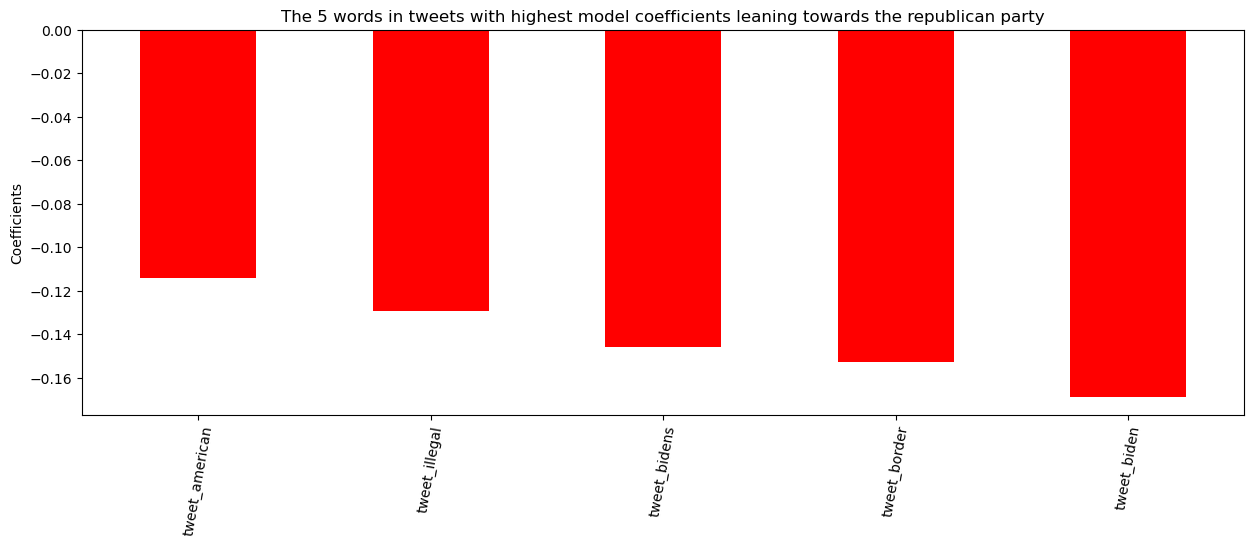

In [67]:
# Extracting the top 20 words to predict republican tweets
word_counts = pd.DataFrame(
    {"coefficients": logistic_model.coef_[0]},
    index=X_train_final.columns
).sort_values("coefficients", ascending=False)

# Plot the top 20 words for democrat tweets
word_counts.loc[word_counts.index.str.startswith('tweet_'),:].tail(5).plot(kind="bar", figsize=(15, 5), legend=False, color='red')
plt.title("The 5 words in tweets with highest model coefficients leaning towards the republican party")
plt.ylabel("Coefficients")
plt.xticks(rotation=80)
plt.show()

In [68]:
word_counts.tail(5)

coefficients
tweet_american     -0.114060
tweet_illegal      -0.129552
tweet_bidens       -0.145929
tweet_border       -0.152687
tweet_biden        -0.168692

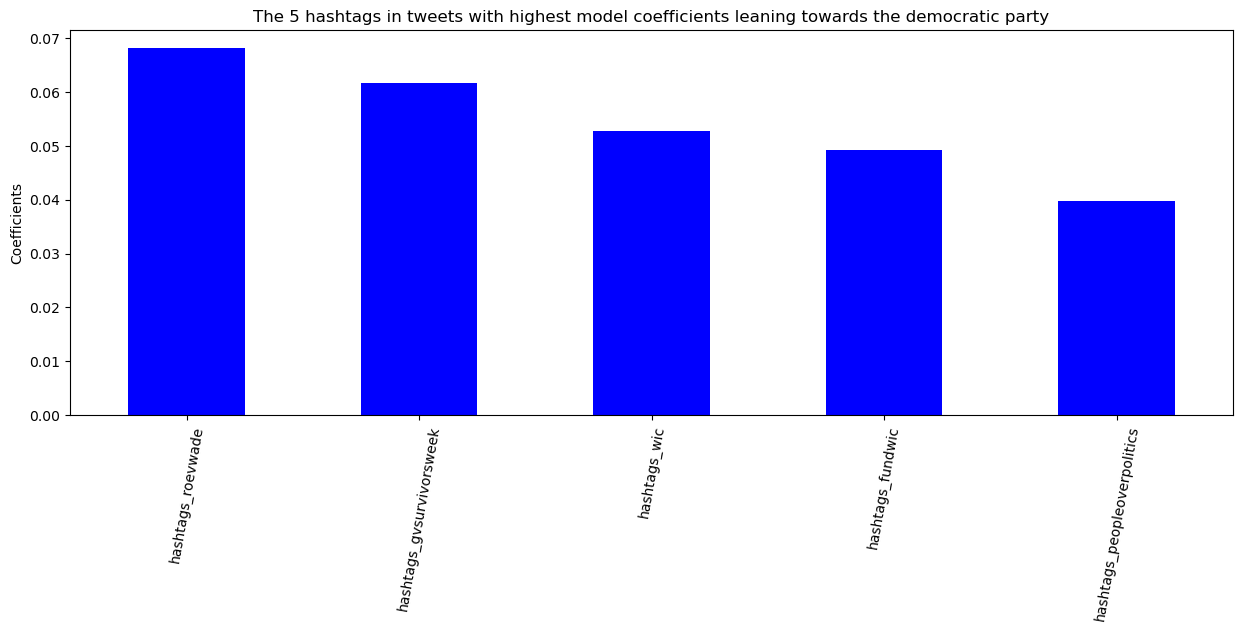

In [69]:
# Extracting the top 20 hashtags to predict democratic tweets
word_counts = pd.DataFrame(
    {"coefficients": logistic_model.coef_[0]},
    index=X_train_final.columns
).sort_values("coefficients", ascending=False)


# Plot the top 20 hashtags for republican tweets
word_counts.loc[word_counts.index.str.startswith('hashtags_'),:].head(5).plot(kind="bar", figsize=(15, 5), legend=False, color='blue')
plt.title("The 5 hashtags in tweets with highest model coefficients leaning towards the democratic party")
plt.ylabel("Coefficients")
plt.xticks(rotation=80)
plt.show()

In [70]:
word_counts.loc[word_counts.index.str.startswith('hashtags_'),:].head(5)

coefficients
hashtags_roevwade                0.068104
hashtags_gvsurvivorsweek         0.061651
hashtags_wic                     0.052773
hashtags_fundwic                 0.049307
hashtags_peopleoverpolitics      0.039790

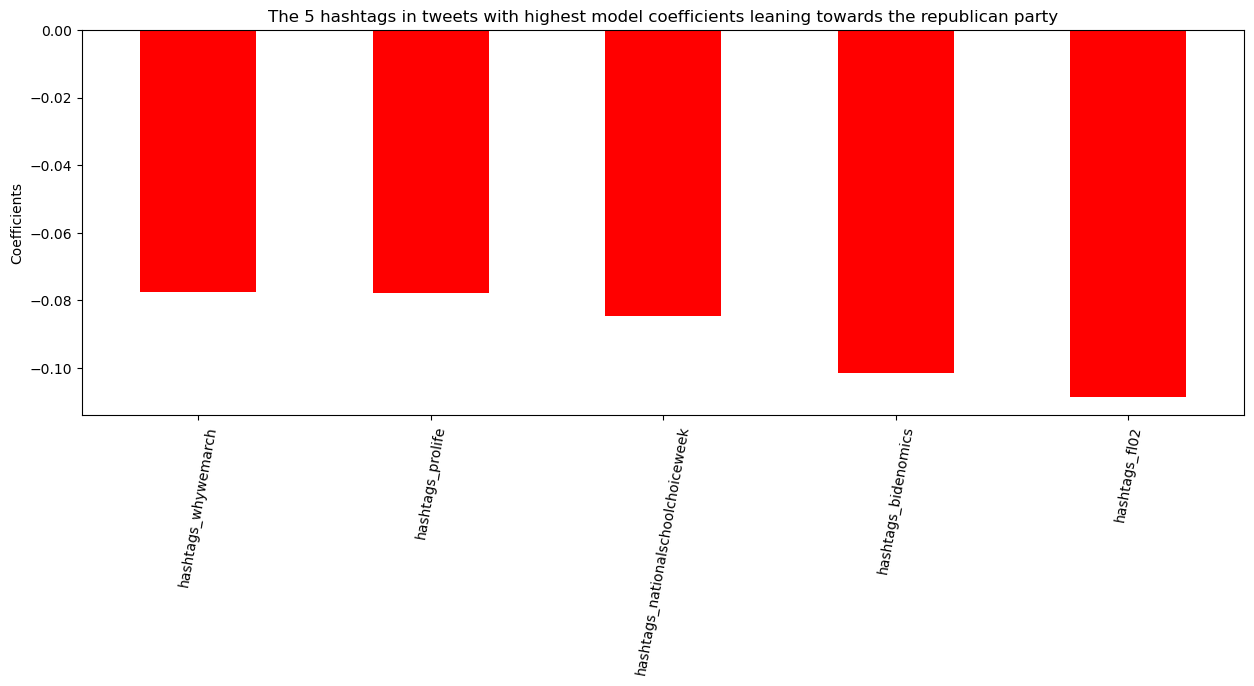

In [71]:
# Extracting the top 20 hashtags to predict republican tweets
word_counts = pd.DataFrame(
    {"coefficients": logistic_model.coef_[0]},
    index=X_train_final.columns
).sort_values("coefficients", ascending=False)


# Plot the top 20 hashtags for democrat tweets
word_counts.loc[word_counts.index.str.startswith('hashtags_'),:].tail(5).plot(kind="bar", figsize=(15, 5), legend=False, color='red')
plt.title("The 5 hashtags in tweets with highest model coefficients leaning towards the republican party")
plt.ylabel("Coefficients")
plt.xticks(rotation=80)
plt.show()

In [72]:
word_counts.loc[word_counts.index.str.startswith('hashtags_'),:].tail(5)

coefficients
hashtags_whywemarch                   -0.077446
hashtags_prolife                      -0.077744
hashtags_nationalschoolchoiceweek     -0.084708
hashtags_bidenomics                   -0.101549
hashtags_fl02                         -0.108500

### Vectorizer: Analysis of Top Terms and Hashtags by Party 

**Top 5 Words on predicting Republican Tweets:**
1. rep: Indicates a potential focus on party representation within Republican tweets, emphasizing party identity or affiliation.

2. illegal: Suggests discussions related to illegal activities, possibly reflecting a focus on immigration policies or law enforcement issues in Republican discourse.

3. illegal immigrants: Points to references related to illegal immigrants, implying discussions around immigration policies and border security in Republican tweets.

4. border: Highlights a potential emphasis on border-related discussions within Republican tweets, indicating a focus on immigration policies and border security.

5. biden: Indicates mentions of Joe Biden, suggesting that discussions around the current Democratic president are less prominent or may have a distinctive tone in Republican tweets.

**Top 5 Hashtags on predicting Republican Tweets:**
1. #marchforlife: Implies a potential association with pro-life movements in Republican tweets, highlighting a focus on anti-abortion discussions.

2. #bidenomics: Suggests discussions related to economic policies associated with Biden, indicating a focus on fiscal matters or critiques of Democratic economic approaches.

3. #prolife: Indicates a potential emphasis on pro-life discussions within Republican tweets, aligning with conservative stances on abortion.

4. #nationalschoolchoiceweek: Points to a potential focus on school choice discussions, reflecting Republican preferences for educational policies that provide alternatives to traditional public schools.

5. #fl02: Suggests a regional or political focus, potentially related to Florida's 2nd congressional district, highlighting localized discussions within Republican tweets


**Top 5 Words on predicting Democratic Tweets:**
1. republican: Implies frequent references to Republicans in Democratic tweets, suggesting a focus on political opposition and party dynamics.

2. reproductive: Indicates a strong emphasis on reproductive issues within the Democratic discourse, reflecting a commitment to related policy discussions.

3. democracy: Highlights a consistent emphasis on democracy within Democratic tweets, possibly related to civic engagement and political values.

4. care: Suggests a focus on compassionate or caring themes, indicating an emphasis on social responsibility and welfare within Democratic discussions.

5. black: Indicates a focus on issues related to the Black community, highlighting a commitment to racial equality and justice within Democratic tweets. 

**Top 5 Hashtags on predicting Democratic Tweets:**
1. #gvsurvivorsweek: Implies a commitment to discussions related to survivors, potentially focusing on advocacy and support for survivors of various issues.

2. #roevwade: Indicates a strong association with Democratic tweets, emphasizing engagement with discussions surrounding reproductive rights and potentially supporting the Roe v. Wade decision.

3. #wic: Suggests a focus on Women, Infants, and Children (WIC) programs, reflecting a commitment to social welfare and family support within Democratic discussions.

4. #peopleoverpolitics: Reflects a Democratic emphasis on prioritizing people over politics, indicating a commitment to human-centric discussions.

5. #fundwic: Suggests a positive association with funding WIC programs, highlighting Democratic advocacy for financial support in social welfare initiatives.

### TF-IDF Vectorizor

TF-IDF (Term Frequency-Inverse Document Frequency) comprises two components: term frequency (TF) and inverse document frequency (IDF).

TF, denoted as $\text{TF}(t, d)$, quantifies how frequently a term (word or phrase), represented by $t$, occurs in a specific document $d$.

IDF, denoted as $\text{IDF}(t)$, is the reciprocal of the number of documents where a term $t$ is present.

The rationale behind TF-IDF is that if a term is widespread across numerous documents, it is likely to be less significant. Conversely, if a term is exclusive to only a few documents, it holds greater relevance in identifying and characterizing those specific documents.





In [73]:
# Import library
from sklearn.feature_extraction.text import TfidfVectorizer

# Instatiate
tfidf_vectorizer = TfidfVectorizer(
    max_df = 0.95,
    min_df = 10,
    ngram_range = (1,2) #search for unigrams and bigrams
)

In [74]:
# fitting the CountVectorizer to the cleaned tweets
tfidf_vectorizer.fit(X_train['clean_tweet'])

# Transforming the clean_tweet column in the training data into a dense array.
# This is necessary for compatibility with the subsequent DataFrame creation.
tfidf_Tweet_X_train = tfidf_vectorizer.transform(X_train['clean_tweet']).toarray()

# transforming the clean_tweet column in the testing data.
tfidf_Tweet_X_test = tfidf_vectorizer.transform(X_test['clean_tweet']).toarray()

# Transforming the training data into a DataFrame with feature names as columns, prefixed with "tweet_".
tfidf_Tweet_X_train = pd.DataFrame(tfidf_Tweet_X_train,columns=tfidf_vectorizer.get_feature_names_out(),index=X_train.index).add_prefix("tweet_")

# Transforming the testing data into a DataFrame with feature names as columns, prefixed with "tweet_".
tfidf_Tweet_X_test = pd.DataFrame(tfidf_Tweet_X_test,columns=tfidf_vectorizer.get_feature_names_out(),index=X_test.index).add_prefix("tweet_")

In [75]:
# fitting the CountVectorizer to the hashtags
# might have to separate the list of hashtags into words with spaces
tfidf_vectorizer.fit(X_train['hashtags'])

# Transforming the 'Hashtags' column for training data
tfidf_Hashtags_X_train = tfidf_vectorizer.transform(X_train['hashtags']).toarray()

# Transforming the 'Hashtags' column for testing data
tfidf_Hashtags_X_test = tfidf_vectorizer.transform(X_test['hashtags']).toarray()

# Transforming the training data into a DataFrame with feature names as columns, prefixed with "Hashtags_"
tfidf_Hashtags_X_train = pd.DataFrame(tfidf_Hashtags_X_train, columns=tfidf_vectorizer.get_feature_names_out(), index=X_train.index).add_prefix("hashtags_")

# Transforming the testing data into a DataFrame with feature names as columns, prefixed with "Hashtags_"
tfidf_Hashtags_X_test = pd.DataFrame(tfidf_Hashtags_X_test, columns=tfidf_vectorizer.get_feature_names_out(), index=X_test.index).add_prefix("hashtags_")


In [76]:
# Combining the sparse matrix of clean_tweet with the data in the training set.
# This concatenation ensures that the transformed text features are included alongside the original numerical features.
tfidf_X_train_final = pd.concat([tfidf_Tweet_X_train, tfidf_Hashtags_X_train, X_train.drop(['clean_tweet', 'hashtags'], axis=1)],axis=1)

# Combining the sparse matrix of hashtags with the data
tfidf_X_test_final = pd.concat([tfidf_Tweet_X_test, tfidf_Hashtags_X_test, X_test.drop(['clean_tweet', 'hashtags'], axis=1)],axis=1)

In [77]:
# Revise symmetry in the shape of the train and test sets
# Shape of the train and test sets
print(f'The shape of the X_train_final set is: {tfidf_X_train_final.shape}')
print(f'The shape of the X_test_final set is: {tfidf_X_test_final.shape}')
print(f'The shape of the y_train set is: {y_train.shape}')
print(f'The shape of the y_test set is: {y_test.shape}')

The shape of the X_train_final set is: (6598, 2522)
The shape of the X_test_final set is: (2829, 2522)
The shape of the y_train set is: (6598,)
The shape of the y_test set is: (2829,)


### Display the highest weighted words and hashtags with TF-IDF

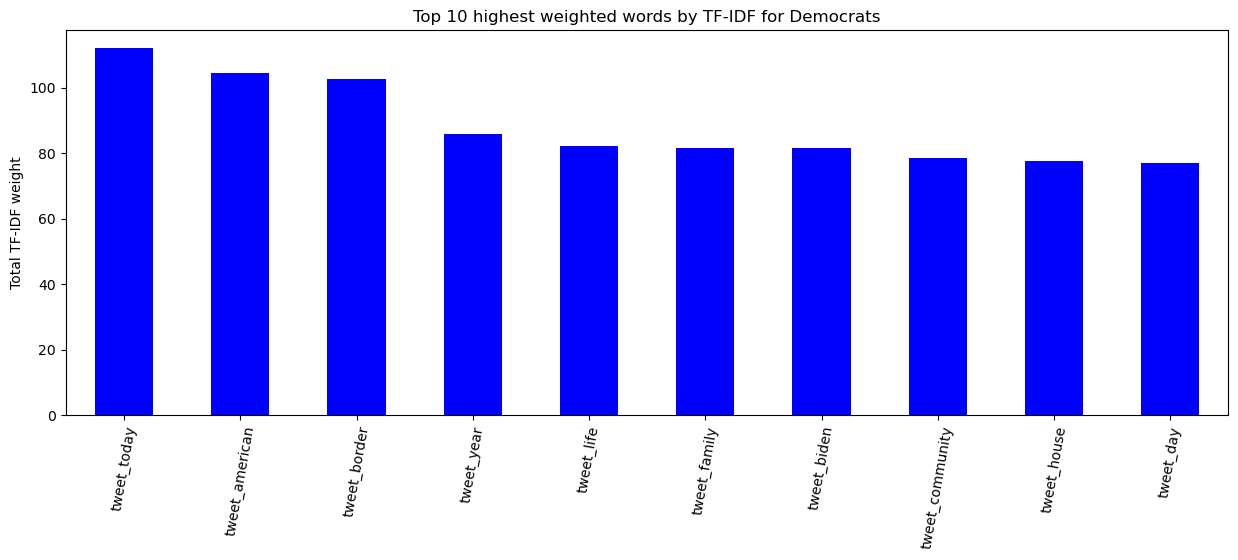

In [78]:
# Top 20 highest weighted words for democratic tweets
word_counts = pd.DataFrame(
    {"counts": tfidf_X_train_final.sum(axis=0)},
    index=tfidf_X_train_final.columns
).sort_values("counts", ascending=False)

# Plot the top 20 words for republican tweets
word_counts.loc[word_counts.index.str.startswith('tweet_'),:].head(10).plot(kind="bar", figsize=(15, 5), legend=False, color='blue')
plt.title("Top 10 highest weighted words by TF-IDF for Democrats")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=80)
plt.show()

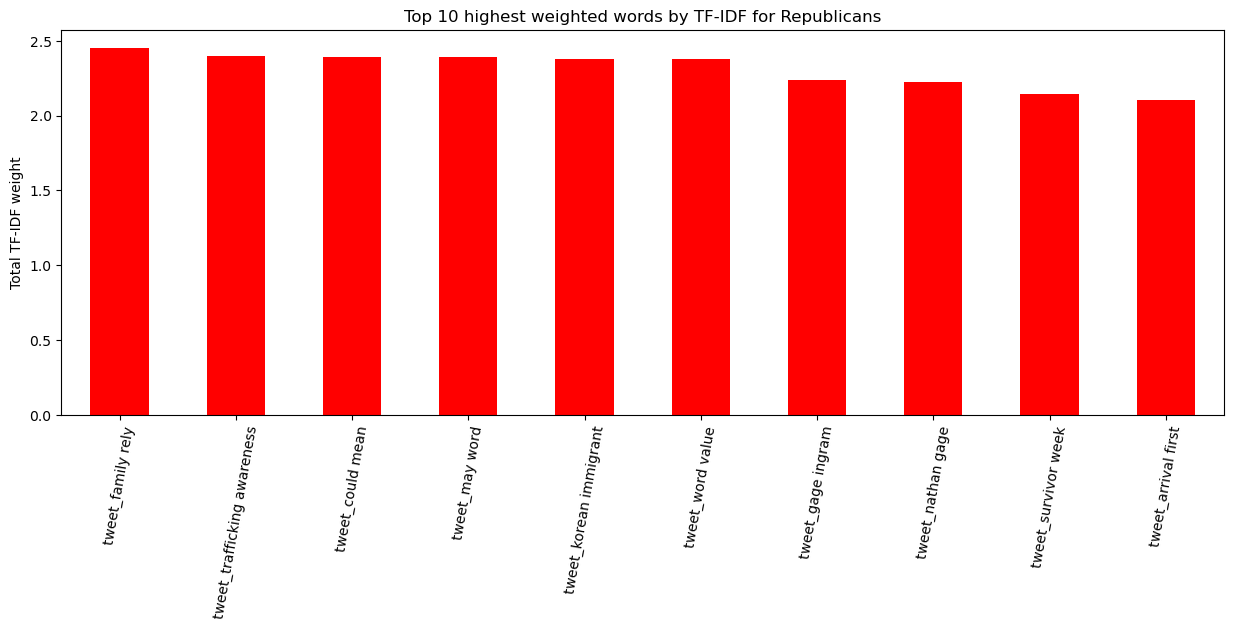

In [79]:
# Top 20 highest weighted words for republicans tweets
word_counts = pd.DataFrame(
    {"counts": tfidf_X_train_final.sum(axis=0)},
    index=tfidf_X_train_final.columns
).sort_values("counts", ascending=False)

# Plot the top 20 words for republican tweets
word_counts.loc[word_counts.index.str.startswith('tweet_'),:].tail(10).plot(kind="bar", figsize=(15, 5), legend=False, color='red')
plt.title("Top 10 highest weighted words by TF-IDF for Republicans")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=80)
plt.show()

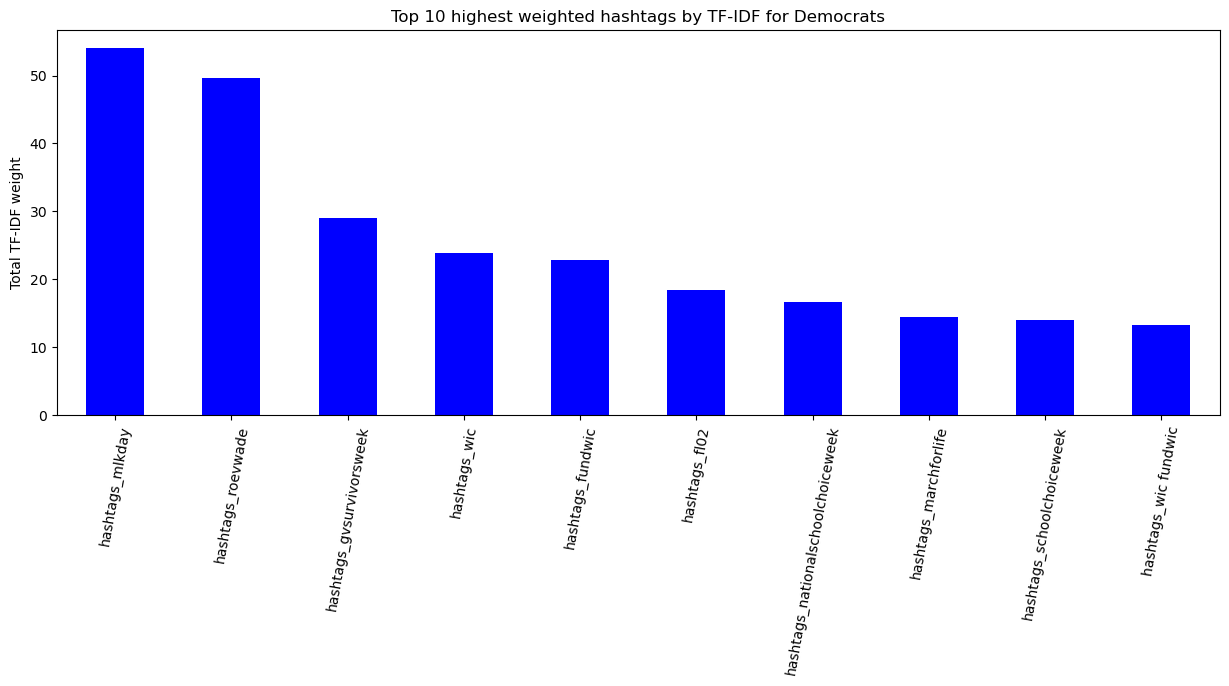

In [80]:
# Top 20 highest weighted hashtags for democrats tweets
word_counts = pd.DataFrame(
    {"counts": tfidf_X_train_final.sum(axis=0)},
    index=tfidf_X_train_final.columns
).sort_values("counts", ascending=False)

# Plot the top 20 words for republican tweets
word_counts.loc[word_counts.index.str.startswith('hashtags_'),:].head(10).plot(kind="bar", figsize=(15, 5), legend=False, color='blue')
plt.title("Top 10 highest weighted hashtags by TF-IDF for Democrats")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=80)
plt.show()

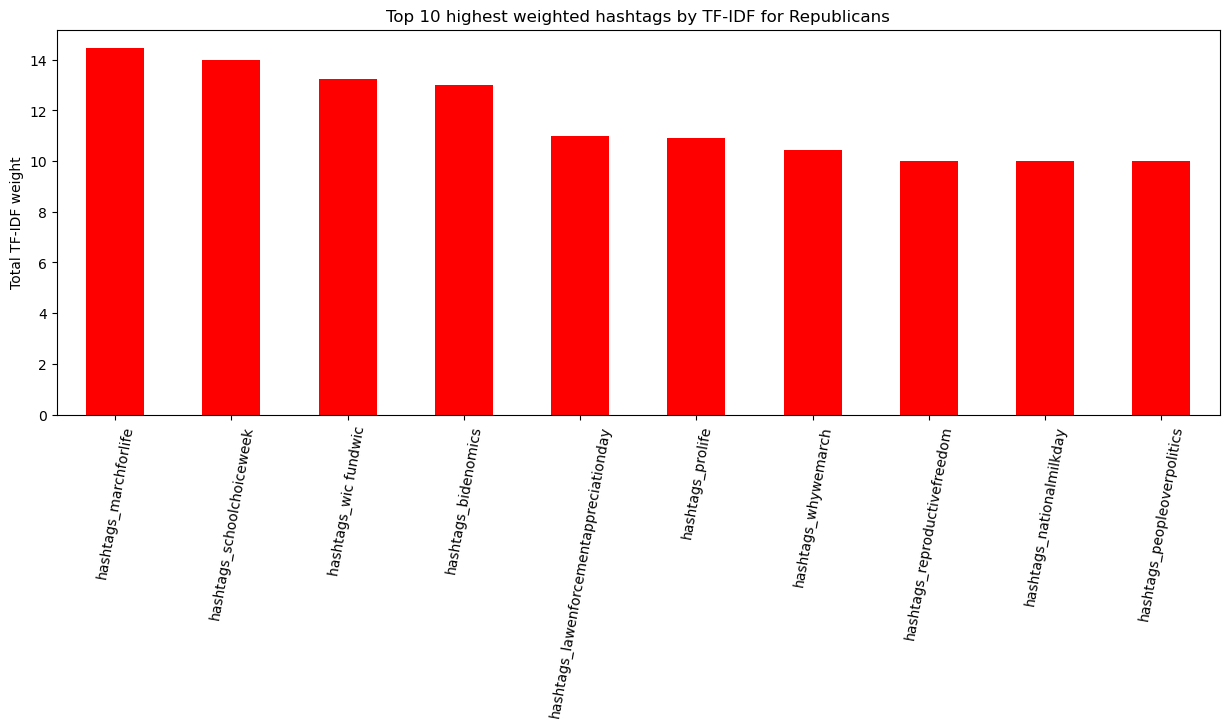

In [81]:
# Top 20 highest weighted hashtags for republican tweets
word_counts = pd.DataFrame(
    {"counts": tfidf_X_train_final.sum(axis=0)},
    index=tfidf_X_train_final.columns
).sort_values("counts", ascending=False)

# Plot the top 20 words for republican tweets
word_counts.loc[word_counts.index.str.startswith('hashtags_'),:].tail(10).plot(kind="bar", figsize=(15, 5), legend=False, color='red')
plt.title("Top 10 highest weighted hashtags by TF-IDF for Republicans")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=80)
plt.show()

### TD-IDF Vectorizer: Analysis of Top Terms and Hashtags by Party 

#### Democrats:

**Focus on traditional values and patriotism**:
Words like "american," "family," "life," "day," and "community" are prominent, suggesting a focus on traditional American values and national unity.

**Opposition to Democratic policies**:
"Biden," "bidenomics," and "prolife" indicate potential allignment to current Democratic policies and support for liberal stances on abortion.

**Concern about border security**:
"Border" features high, highlighting a possible emphasis on border policies.

**Engagement with current events**: 
"Gvsurvivorsweek," "roevwade," and "mlkday" show engagement with recent events related to gun violence, abortion rights, and Martin Luther King Jr. Day.

#### Republicans:

**Emphasis on social justice and action**:
Words like "guide," "action," "build," "choice," and "survivor" suggest a focus on social justice issues, action, and empowerment.

**Specific policy concerns**:
"Ev charging," "charging station," and "monterey park" hint at potential involvement with environmental and community-focused initiatives.

**Focus on victims of violence**:
"Monterey park," "survivor," and "endgunviolence" indicate concern for victims of recent tragedies and advocacy for gun control.

**Intersectionality and identity**:
"Korean immigrant" and "121 year" might point to engagement with issues related to marginalized communities and historical events.



### Logistic Regression for TF-IDF Vectorizor

In [82]:
# Instantiatie
tfidf_scaler = StandardScaler()

# fit
tfidf_scaler.fit(tfidf_X_train_final)

# Transform
tfidf_X_train_scaled = tfidf_scaler.transform(tfidf_X_train_final)
tfidf_X_test_scaled = tfidf_scaler.transform(tfidf_X_test_final)

In [83]:
# Initialize Logistic Regression model
tfidf_logistic_model = LogisticRegression(C=0.1, tol=0.1, n_jobs=-1, solver='sag')

# Fit the model on training data
tfidf_logistic_model.fit(tfidf_X_train_scaled, y_train)

LogisticRegression(C=0.1, n_jobs=-1, solver='sag', tol=0.1)

In [84]:
# Predictions on training and testing data
tfidf_train_preds = tfidf_logistic_model.predict(tfidf_X_train_scaled)
tfidf_test_preds = tfidf_logistic_model.predict(tfidf_X_test_scaled)

# Calculate accuracy on training and testing sets
tfidf_train_accuracy = accuracy_score(y_train, tfidf_train_preds)
tfidf_test_accuracy = accuracy_score(y_test, tfidf_test_preds)

print(f"Training Accuracy: {tfidf_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {tfidf_test_accuracy*100:.2f}%")

Training Accuracy: 92.82%
Testing Accuracy: 75.22%


### Interpreting Results`

**Vectorizer Model**:

- Training Accuracy: 89.24%
- Testing Accuracy: 76.56%

**TF-IDF Vectorizer Model**:

- Training Accuracy: 92.82%
- Testing Accuracy: 75.22%

Comparing the Vectorizer and TF-IDF Vectorizer models for predicting party affiliation based on tweets and hashtags, several factors should be considered. The TF-IDF Vectorizer model exhibits a higher training accuracy (92.82%) than the Vectorizer model (89.24%), suggesting its ability to capture more intricate patterns in the training data. However, on the testing data, the Vectorizer model outperforms with a higher accuracy (76.56%) compared to the TF-IDF Vectorizer model (75.22%). This discrepancy indicates potential overfitting in the TF-IDF model, as it may have learned noise from the training data that does not generalize well to new tweets. 

### Pipeline for a Random Forest Classifier

Employing a pipeline, the data will undergo scaling and decision tree classifier will be constructed.

In [85]:
# from sklearn.decomposition import NMF
# from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define the pipeline with RandomForestClassifier
estimators_rf = [('scale', StandardScaler()),
                 # ('dim_red', NMF()),
                 # ('feature_selection', SelectKBest(f_classif)),
                 ('model', RandomForestClassifier())]

pipe_rf = Pipeline(estimators_rf)


param_grid_rf = [{'scale': [StandardScaler(), MinMaxScaler()]
               # 'feature_selection__k': [20, 50, 100],  # Adjust k for feature selection
               # 'dim_red__n_components': [5, 10, 20, 50, 100],  # Explore smaller component numbers
               # # 'model__C':[0.001, 0.01, 0.1, 1, 10, 100],  # Reduce C values for less memory
               # 'model__penalty': ["l1","l2"],
                 }]

grid_rf = GridSearchCV(pipe_rf,
                    param_grid_rf,
                    cv=5,
                    verbose=2,
                    n_jobs=1,  # Set to 1 for conservative memory usage
                    scoring="f1_macro",
                    )


In [86]:
fittedgrid_rf = grid_rf.fit(X_train_final, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .............................scale=StandardScaler(); total time=  27.9s
[CV] END .............................scale=StandardScaler(); total time=  27.3s
[CV] END .............................scale=StandardScaler(); total time=  25.7s
[CV] END .............................scale=StandardScaler(); total time=  26.4s
[CV] END .............................scale=StandardScaler(); total time=  26.7s
[CV] END ...............................scale=MinMaxScaler(); total time=  26.0s
[CV] END ...............................scale=MinMaxScaler(); total time=  26.5s
[CV] END ...............................scale=MinMaxScaler(); total time=  26.7s
[CV] END ...............................scale=MinMaxScaler(); total time=  26.0s
[CV] END ...............................scale=MinMaxScaler(); total time=  27.5s


In [87]:
# # Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_rf.best_params_)
print(f"Best Accuracy: {grid_rf.best_score_*100:.2f}%")

Best Parameters: {'scale': StandardScaler()}
Best Accuracy: 75.14%


### Pipeline for a SVM


In [88]:
from sklearn import svm
from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification


# Create a pipeline with StandardScaler, PCA, and SVM
estimators_svc = [('scale', StandardScaler()),
                  ('model', svm.SVC())]

pipe_svc = Pipeline(estimators_svc)

# Define the parameter grid for GridSearchCV
param_grid_svc = [ {'model': [svm.SVC()],
                    'scale': [StandardScaler(), MinMaxScaler()],
                    # 'model__gamma': [0.1, 1, 10, 100],
                    'model__C': [ 0.1, 1, 10, 100]}
                 ]

# Create GridSearchCV object
grid_svc = GridSearchCV(pipe_svc,
                    param_grid_svc,
                    cv=5,
                    verbose=2,
                    n_jobs=1,  # Set to 1 for conservative memory usage
                    scoring="f1_macro"
                    )

# Fit the model
grid_svc.fit(X_train_final, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..model=SVC(), model__C=0.1, scale=StandardScaler(); total time= 1.7min
[CV] END ..model=SVC(), model__C=0.1, scale=StandardScaler(); total time= 1.7min
[CV] END ..model=SVC(), model__C=0.1, scale=StandardScaler(); total time= 1.7min
[CV] END ..model=SVC(), model__C=0.1, scale=StandardScaler(); total time= 1.8min
[CV] END ..model=SVC(), model__C=0.1, scale=StandardScaler(); total time= 1.8min
[CV] END ....model=SVC(), model__C=0.1, scale=MinMaxScaler(); total time= 1.8min
[CV] END ....model=SVC(), model__C=0.1, scale=MinMaxScaler(); total time= 2.0min
[CV] END ....model=SVC(), model__C=0.1, scale=MinMaxScaler(); total time= 1.9min
[CV] END ....model=SVC(), model__C=0.1, scale=MinMaxScaler(); total time= 1.8min
[CV] END ....model=SVC(), model__C=0.1, scale=MinMaxScaler(); total time= 1.9min
[CV] END ....model=SVC(), model__C=1, scale=StandardScaler(); total time= 1.6min
[CV] END ....model=SVC(), model__C=1, scale=Stand

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=1,
             param_grid=[{'model': [SVC(C=1)], 'model__C': [0.1, 1, 10, 100],
                          'scale': [StandardScaler(), MinMaxScaler()]}],
             scoring='f1_macro', verbose=2)

In [89]:
# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_svc.best_params_)
print(f"Best Accuracy: {grid_svc.best_score_*100:.2f}%")

Best Parameters: {'model': SVC(C=1), 'model__C': 1, 'scale': StandardScaler()}
Best Accuracy: 75.54%


### Model Analysis


- **Logistic Regression on Vectorizer**:

The training accuracy is higher than the testing accuracy, indicating a potential overfitting issue. It's important to be cautious about the model's generalization to new, unseen data.

- **Logistic Regression on TF-IDF Vectorizer**:

The TF-IDF Vectorizer model displays a higher training accuracy (92.82%) than the basic Vectorizer model (89.24%), showcasing its ability to capture intricate patterns. However, on the testing data, the Vectorizer model outperforms with a higher accuracy (76.56% vs. 75.22%), suggesting potential overfitting in the TF-IDF model, where it may have learned noise from the training data that does not generalize well to new tweets.

- **Logistic Regression on Word Embedding Coefficient**:

The accuracy is significantly low, almost aligning with random chance, indicating that this model is not suitable for predicting and classifying tweets based on party affiliation.

- **Logistic Regression on Pipeline**:

The accuracy with the best parameters is slightly lower than the original logistic regression model. It's interesting to note that scaling is applied as part of the pipeline, and regularization is applied with the selected parameters.

- **Random Forest on Pipeline**:

The best parameters only involve scaling. Random Forest models typically handle feature scaling internally, so the explicit scaling in the pipeline might not have a significant impact.

- **Support Vector Machine (SVM) on Pipeline**:

SVM with the selected parameters and scaling achieves a slightly lower accuracy compared to logistic regression. SVM can be sensitive to hyperparameter tuning, and the chosen parameters might not be optimal for your data.


### Model Conclusion

The initial Logistic Regression model exhibits a training accuracy of 89.24% and a testing accuracy of 76.56%. While there is a slight drop in accuracy on the test set, the model demonstrates decent generalization. However, the difference between training and testing accuracies suggests a potential overfitting issue that should be addressed.

The subsequent attempt to improve the model using a Logistic Regression pipeline, which incorporates parameter tuning and feature scaling, resulted in a marginal decrease in accuracy (76.05%). The pipeline's additional steps did not significantly enhance the model's performance.

**Potential Value of the Initial Logistic Regression Model**:

The initial Logistic Regression model, despite potential overfitting, can add value to the political party prediction task in the context of predicting political inclinations in tweets. Here's how:

1. **Interpretability**: Logistic Regression models are inherently interpretable, providing insights into the importance of each feature. In a politically charged context, understanding which features contribute to the prediction can be crucial for transparency and explanation.

2. **Simplicity**: The simplicity of Logistic Regression makes it computationally efficient and less prone to overfitting in some cases. This can be advantageous, especially if the dataset is not extremely large like ours.

3. **Baseline Performance**: With a testing accuracy of 76.56%, the initial Logistic Regression model serves as a baseline for comparison. Subsequent model improvements can be benchmarked against this baseline to assess the effectiveness of enhancements.


### Word Embedding

Word Embedding using Bert

In [90]:
# Import library
import gensim

In [91]:
# Define a model
model = gensim.models.KeyedVectors.load_word2vec_format(
    'lexvec-wikipedia-word-vectors', binary=False
)

In [92]:
# Define a word embedding function
from gensim.utils import simple_preprocess

def sentence2vec(text):
    """
    Embed a sentence by averaging the word vectors of the tokenized text. Out-of-vocabulary words are replaced by the zero-vector.
    -----
    
    Input: text (string)
    Output: embedding vector (np.array)
    """
    tokenized = simple_preprocess(text)
    
    word_embeddings = [np.zeros(300)]
    for word in tokenized:
        # if the word is in the model then embed
        if word in model:
            vector = model[word]
        # add zeros for out-of-vocab words
        else:
            vector = np.zeros(300)
            
        word_embeddings.append(vector)
    
    # average the word vectors
    sentence_embedding = np.stack(word_embeddings).mean(axis=0)
    
    return sentence_embedding

In [93]:
# use the sentence2vec function to embed out tweets
X_train_emb = X_train['clean_tweet'].apply(sentence2vec)

X_train_emb.head()

7295    [0.07532819960266351, -0.04316232182085514, 0....
7811    [0.04369109107012099, 0.0218745463273742, 0.06...
5247    [0.006998118795454502, -0.005941801024600863, ...
3778    [0.060164849605644125, 0.04160679941996932, 0....
2310    [0.017885467068602643, -0.05349246823849777, 0...
Name: clean_tweet, dtype: object

In [94]:
# Convert series to df
X_train_emb_df = pd.DataFrame(X_train_emb)

# Display results
print(X_train_emb_df)

                                            clean_tweet
7295  [0.07532819960266351, -0.04316232182085514, 0....
7811  [0.04369109107012099, 0.0218745463273742, 0.06...
5247  [0.006998118795454502, -0.005941801024600863, ...
3778  [0.060164849605644125, 0.04160679941996932, 0....
2310  [0.017885467068602643, -0.05349246823849777, 0...
...                                                 ...
1174  [0.007389293545309235, -0.04301305963685188, 0...
7200  [-0.04347219616174698, 0.022262402530759572, 0...
2973  [-0.023412571558202172, -0.008520618075549248,...
8069  [0.01466444410228481, -0.01105555540157689, 0....
581   [0.15631160140037537, -0.03017479982227087, 0....

[6598 rows x 1 columns]


In [95]:
# Convert to a dataframe with elements as columns
new_df = pd.DataFrame(X_train_emb_df['clean_tweet'].tolist(), columns = [i for i in range(300)], index=X_train_emb_df.index)

# Define a 'is_democrat' column as established in df_cleaned
new_df['is_democrat'] = df_cleaned['is_democrat']


In [96]:
# Define variable for null values in 'is_democrat' columns
null_parties = new_df[(new_df['is_democrat'].isnull())]

# Drop the rows based on the index
new_df = new_df.drop(null_parties.index)

# Check results
new_df['is_democrat'].isna().sum()

0

We have successfully deleted 183 rows where 'is_democrat' columns had a null value

In [97]:
# Display new_df
new_df

0         1         2         3         4         5         6  \
7295  0.075328 -0.043162  0.141913 -0.017100 -0.002649 -0.000674 -0.007718   
7811  0.043691  0.021875  0.065325 -0.027470 -0.060498  0.063125 -0.061078   
5247  0.006998 -0.005942  0.049265 -0.011152 -0.025228  0.014240 -0.081017   
3778  0.060165  0.041607  0.066637 -0.023635 -0.014593  0.027687 -0.051294   
2310  0.017885 -0.053492  0.017741 -0.031278 -0.054197  0.078354 -0.029093   
...        ...       ...       ...       ...       ...       ...       ...   
1174  0.007389 -0.043013  0.064976 -0.024978 -0.011550 -0.018178 -0.026634   
7200 -0.043472  0.022262  0.115887 -0.101775 -0.020092  0.103052 -0.014634   
2973 -0.023413 -0.008521  0.016263 -0.000345 -0.031250  0.054264 -0.066454   
8069  0.014664 -0.011056  0.022800 -0.017279  0.007350  0.092835 -0.054337   
581   0.156312 -0.030175  0.099855  0.039629 -0.021990  0.018901 -0.056343   

             7         8         9  ...       291       292       293  \
7295 -0.040220 -0.012595 -0.038184  ... -0.004079 -0.096810 -0.037429   
7811 -0.055535  0.006213  0.015146  ... -0.057075 -0.040689 -0.064873   
5247 -0.081394  0.062533  0.014193  ...  0.021870 -0.060071 -0.097409   
3778 -0.072247  0.049518  0.040324  ... -0.073697 -0.059866 -0.063507   
2310 -0.033808  0.006659  0.049736  ... -0.050104 -0.053833 -0.110274   
...        ...       ...       ...  ...       ...       ...       ...   
1174 -0.027718  0.012644 -0.007036  ... -0.013701 -0.078904 -0.072357   
7200 -0.076462 -0.001081 -0.015058  ... -0.030654  0.010453 -0.037427   
2973 -0.001563 -0.028773  0.000112  ...  0.036890 -0.051231 -0.107740   
8069 -0.060321  0.023248  0.009288  ... -0.022009  0.005795 -0.110392   
581  -0.078691 -0.022642  0.020371  ... -0.052234  0.004440 -0.075663   

           294       295       296       297       298       299  is_democrat  
7295  0.011878  0.106086 -0.000453 -0.018570  0.049402  0.097142            1  
7811  0.025244  0.051447  0.010151 -0.004964 -0.002827  0.064025            1  
5247  0.015716  0.032871  0.004168  0.005192  0.039297  0.022616            0  
3778  0.030702 -0.018967 -0.008857 -0.015173 -0.015964  0.068133            1  
2310 -0.040764  0.098858  0.006928 -0.021450  0.028077  0.039219            1  
...        ...       ...       ...       ...       ...       ...          ...  
1174  0.001009  0.028496  0.035190  0.071032  0.061485  0.010102            0  
7200 -0.016112  0.100742 -0.032288 -0.077422 -0.078031  0.000450            0  
2973  0.038664  0.014324  0.016353 -0.040464  0.039680 -0.026401            0  
8069  0.026516  0.042609  0.018003 -0.022619 -0.003427 -0.072268            1  
581   0.001613  0.063200 -0.007452  0.014670 -0.089570  0.010240            0  

[6598 rows x 301 columns]

#### Logistic Regression for Word Embedding Coefficient

In [98]:
# Tokenize the 'Tweet' column
# PD Conancat between the vectorizer text and the remaning columns

#run the fit transform first and then do the toarray() to get it back intoa numpy format and the pd concat it into the other column I want to do.

X = new_df.drop(columns='is_democrat')

# Define target variable
y = new_df['is_democrat']

emb_X_train, emb_X_test, emb_y_train, emb_y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [99]:
from sklearn.decomposition import PCA


In [100]:
mypca = PCA(n_components=3)

X_train_pca = mypca.fit_transform(emb_X_train)
X_test_pca = mypca.transform(emb_X_test)

In [101]:
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

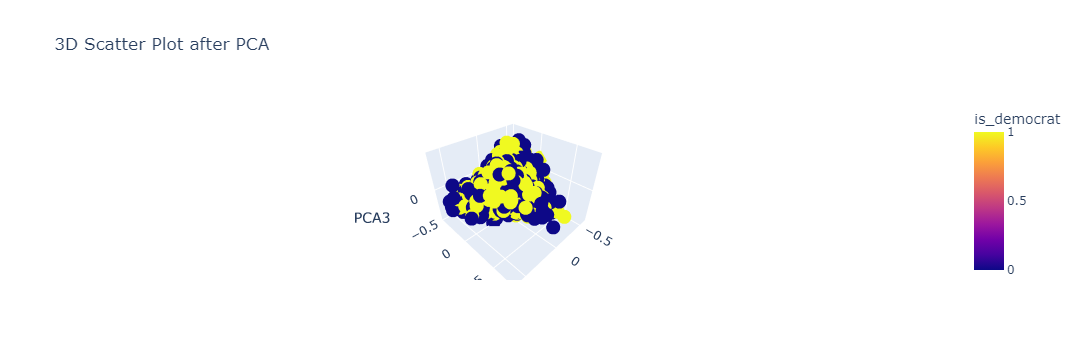

In [103]:
# Create a DataFrame with the PCA components and the target variable
df_3d = pd.DataFrame(data={'PCA1': X_train_pca[:, 0], 'PCA2': X_train_pca[:, 1], 'PCA3': X_train_pca[:, 2], 'is_democrat': emb_y_train})

# Plot 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_3d, x='PCA1', y='PCA2', z='PCA3', color='is_democrat', title='3D Scatter Plot after PCA',)
fig.show()

The presence of non-visible clusters suggests that the model may face challenges in accurately predicting the political inclination (democrat or republican) of a tweet based on its coefficients. This observation implies potential complexities in discerning clear patterns or trends within the feature space, which could impact the model's predictive performance. 

### Logistic Regression for Word Embedding Coefficient

In [104]:
# Initialize Logistic Regression modele
emb_logmodel = LogisticRegression(C=0.1, tol=0.1, n_jobs=-1, solver='sag')

# Fit the model on training data
emb_logmodel.fit(X_train_pca, emb_y_train)


LogisticRegression(C=0.1, n_jobs=-1, solver='sag', tol=0.1)

In [105]:
# Predictions on training and testing data
emb_train_preds = emb_logmodel.predict(X_train_pca)
emb_test_preds = emb_logmodel.predict(X_test_pca)

# Calculate accuracy on training and testing sets
emb_train_accuracy = accuracy_score(emb_y_train, emb_train_preds)
emb_test_accuracy = accuracy_score(emb_y_test, emb_test_preds)

print(f"Training Accuracy: {emb_train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {emb_test_accuracy*100:.2f}%")

Training Accuracy: 51.54%
Testing Accuracy: 51.87%


### Interpreting Results


The Logistic Regression results obtained on the word embedding coefficients exhibit a limited accuracy, with a training accuracy of 51.54% and testing accuracy of 51.87%. These figures indicate that the model is performing only slightly better than random chance, suggesting challenges in capturing meaningful patterns within the data.

It's noteworthy that these results come after applying Principal Component Analysis (PCA), a technique aimed at reducing dimensionality. Prior to PCA, the accuracy was around 56%, and despite experimenting with various approaches to enhance the model's performance, the results remain suboptimal.

The observed difficulties in achieving higher accuracy may stem from the inherent complexity of the task—predicting the political inclination of tweets based on word embedding coefficients. The presence of non-visible clusters, as identified in the analysis, adds to the complexity, contributing to the model's struggles in making accurate predictions. 

here

### Confusion Matrix

Examining the confusion matrix for the Logistic Regression model, which yielded a superior accuracy score.

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the following prediction already calculated above: test_preds = logistic_model.predict(X_test_scaled)

# Generate confusion matrix
reviews_matrix = confusion_matrix(y_test, test_preds)

# Label rows and columns
reviews_df = pd.DataFrame(
    reviews_matrix,
    columns=["Predicted Democrat", "Predicted Republican"],
    index=["True Democrat", "True Republican"]
)

display(reviews_df)

Predicted Democrat  Predicted Republican
True Democrat                  1097                   306
True Republican                 357                  1069

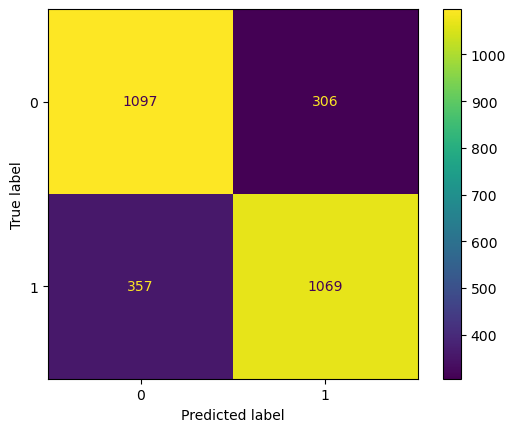

In [107]:
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test_scaled, y_test);

In [108]:
# select the FP from the confusion matrix
# true label 0 & predicted label 1
fp = reviews_matrix[0, 1]

print(f"{fp} democrats were misclassified as republicans.")

306 democrats were misclassified as republicans.


In [109]:
# select the TP from the confusion matrix
# true label 1 & predicted label 1
tp = reviews_matrix[1, 1]

# total number of true label 1
bad_reviews = reviews_matrix[1, :].sum()

print(f"{tp} republicans were predicted correctly by the model out of {bad_reviews} republicans.")

1069 republicans were predicted correctly by the model out of 1426 republicans.


### Precission and Recall

In [110]:
# Precision 
from sklearn.metrics import precision_score

print(f"The precision score is: {precision_score(y_test, test_preds) * 100:.2f}%")

The precision score is: 77.75%


In [111]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
print(f"The recall score is: {recall_score(y_test, test_preds) *100:.2f}%")

The recall score is: 74.96%


In [112]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, test_preds)
print(report_initial)

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1403
           1       0.78      0.75      0.76      1426

    accuracy                           0.77      2829
   macro avg       0.77      0.77      0.77      2829
weighted avg       0.77      0.77      0.77      2829



### Confusion Matrix Results Analysis

**Precision and Recall**:

- Precision for Democrats (class 1) is 0.78, indicating that out of all predicted Democrat tweets, 78% were actually Democrat.

- Precision for Republicans (class 0) is 0.75, indicating that out of all predicted Republican tweets, 75% were actually Republican.

- Recall for Democrats is 0.75, meaning that the model correctly identified 75% of the actual Democrat tweets.

- Recall for Republicans is 0.78, indicating that the model correctly identified 78% of the actual Republican tweets.

**F1-Score**:

- The F1-score, which balances precision and recall, is 0.77 for Republicans and 0.76 for Democrats, suggesting a reasonable trade-off between precision and recall.

**Accuracy**:

- The overall accuracy of the model is 77%, indicating the proportion of correctly classified tweets out of the total.

**Macro and Weighted Averages**:

- The macro average of precision, recall, and F1-score is around 0.77, indicating a balanced performance across classes.

- The weighted average considers the class imbalance and is also around 0.77.

In summary, the model demonstrates a reasonable ability to predict both Democrat and Republican tweets. However, further fine-tuning or the exploration of more advanced models could potentially enhance the classification performance.

## 4. Sentiment Analysis

In [113]:
!pip install textblob


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
from textblob import TextBlob
from textblob import Word

In [115]:
# Computes the sentiment polarity and subjectivity of the first 5 tweets in the 'clean_tweet' column of the DataFrame.
# Returns a series of sentiment polarity and subjectivity values for the first 5 tweets.

def polarity_subjectivity(df):
    return df['clean_tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

#
result = polarity_subjectivity(df_cleaned)

# Print the results
print(result)

0    (-0.027777777777777773, 0.3333333333333333)
1    (-0.16666666666666666, 0.35555555555555557)
2      (0.06818181818181818, 0.3522727272727273)
3      (0.13333333333333333, 0.6833333333333332)
4      (0.15476190476190477, 0.5089285714285714)
Name: clean_tweet, dtype: object


We can can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [116]:
# Analyzes the sentiment of tweets in the 'clean_tweet' column using TextBlob sentiment analysis.
def sentiment_analysis(df):
    df['sentiment'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
    return df[['clean_tweet','sentiment']]

# Run function into a variable
sentiment = sentiment_analysis(df_cleaned)

In [117]:
# Add a party columns with real values
sentiment['party'] = df_cleaned['party']

C:\Users\erick\AppData\Local\Temp\ipykernel_24360\1484718693.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
# Display results
sentiment

clean_tweet  sentiment party
0     joe bidens first day oval office signed legisl...  -0.027778     R
1     sorry hear passing longtime caregiver leo lion...  -0.166667     R
2     u rep robert aderholt r-haleyville recently to...   0.068182     R
3     im sorry hear anthony passing frequently inter...   0.133333     R
4     hr 6914 pregnant student right act college uni...   0.154762     R
...                                                 ...        ...   ...
9422  never understood donâ€™t talk men body ban vas...   0.000000     D
9423  acknowledge sacrifice law enforcement personne...   0.500000     D
9424  2024 house must join senate passing crucial piece   0.000000     D
9425  thats proud introduce maternal child health st...   0.800000     D
9426  united state 1 169 birth affected stillbirth y...   0.175000     D

[9427 rows x 3 columns]

#### Plot a histogram of the sentiment distribution amongst all tweets from both parties.

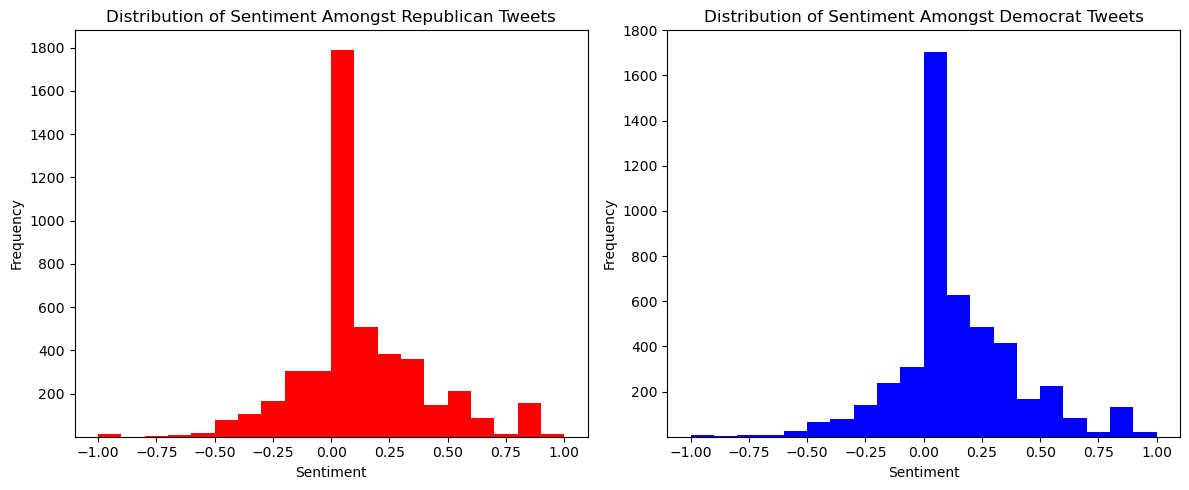

In [119]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for Republican Tweets
rep_df = sentiment.loc[sentiment['party'] == 'R', ]
rep_ax = rep_df['sentiment'].plot(kind='hist', bins=20, color='red', ax=axes[0])
rep_ax.set_xlabel('Sentiment')
rep_ax.set_ylabel('Frequency')
rep_ax.set_title('Distribution of Sentiment Amongst Republican Tweets')

# Plot for Democrat Tweets
dem_df = sentiment.loc[sentiment['party'] == 'D', ]
dem_ax = dem_df['sentiment'].plot(kind='hist', bins=20, color='blue', ax=axes[1])
dem_ax.set_xlabel('Sentiment')
dem_ax.set_ylabel('Frequency')
dem_ax.set_title('Distribution of Sentiment Amongst Democrat Tweets')

# Set common y-axis range
common_y_ticks = range(200, 1801, 200)
for ax in axes:
    ax.set_yticks(common_y_ticks)

# Adjust layout
plt.tight_layout()

#### Average overall sentiment grouped by party

**0** for republican

**1** for democrat

In [120]:
def average_sentiment_by_party(df):
    df['sentiment'] = df['clean_tweet'].apply(lambda x: TextBlob(x).sentiment[0])
    average_sentiments = df.groupby('is_democrat')['sentiment'].mean()
    return average_sentiments

# Call the function
average_sentiments_by_party = average_sentiment_by_party(df_cleaned)

# Print the result
print(average_sentiments_by_party)

is_democrat
0    0.113001
1    0.130541
Name: sentiment, dtype: float64


#### Top words indicating positive and negative sentiment for each party

In [121]:
def top_words_by_sentiment(df, party_value, sentiment_threshold=0):
    party_tweets = df[df['is_democrat'] == party_value]
    positive_tweets = party_tweets[party_tweets['sentiment'] > sentiment_threshold]
    negative_tweets = party_tweets[party_tweets['sentiment'] < -sentiment_threshold]
    
    vectorizer = CountVectorizer(stop_words=stopwords, ngram_range = (1,3))
    
    # Positive Words
    positive_words = vectorizer.fit_transform(positive_tweets['clean_tweet'])
    positive_words_sum = positive_words.sum(axis=0)
    positive_words_freq = [(word, positive_words_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    positive_words_freq = sorted(positive_words_freq, key=lambda x: x[1], reverse=True)[:20]

    # Negative Words
    negative_words = vectorizer.fit_transform(negative_tweets['clean_tweet'])
    negative_words_sum = negative_words.sum(axis=0)
    negative_words_freq = [(word, negative_words_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    negative_words_freq = sorted(negative_words_freq, key=lambda x: x[1], reverse=True)[:20]

    return positive_words_freq, negative_words_freq

# Call the function for Democrats (is_democrat = 1)
positive_words_dem, negative_words_dem = top_words_by_sentiment(df_cleaned, 1)

# Print the results
print("Top positive words for Democrats:")
print(positive_words_dem)

print("\nTop negative words for Democrats:")
print(negative_words_dem)

# Call the function for Republicans (is_democrat = 0)
positive_words_rep, negative_words_rep = top_words_by_sentiment(df_cleaned, 0)

# Print the results
print("\nTop positive words for Republicans:")
print(positive_words_rep)

print("\nTop negative words for Republicans:")
print(negative_words_rep)

Top positive words for Democrats:
[('right', 425), ('today', 422), ('year', 392), ('community', 307), ('work', 297), ('new', 292), ('american', 287), ('im', 272), ('health', 254), ('day', 253), ('woman', 252), ('proud', 240), ('family', 239), ('care', 228), ('need', 225), ('great', 211), ('make', 209), ('abortion', 202), ('king', 197), ('congress', 193)]

Top negative words for Democrats:
[('republican', 143), ('family', 136), ('year', 134), ('today', 113), ('woman', 106), ('american', 102), ('must', 91), ('house', 90), ('day', 87), ('keep', 85), ('need', 80), ('congress', 77), ('community', 75), ('people', 72), ('million', 72), ('one', 72), ('government', 71), ('abortion', 71), ('care', 71), ('im', 70)]

Top positive words for Republicans:
[('life', 342), ('border', 324), ('today', 307), ('american', 290), ('proud', 274), ('right', 229), ('family', 220), ('great', 215), ('biden', 209), ('new', 200), ('im', 183), ('act', 183), ('day', 181), ('work', 180), ('year', 177), ('support', 174

#### Visualize top words indicating positive and negative sentiment for each party

In [122]:
# Plotting Top 15 Words for Sentiment
def plot_top_words(words_freq, party_name, sentiment_type, color):
    words, freq = zip(*words_freq)
    plt.figure(figsize=(15, 5))
    plt.bar(words, freq, color=color)
    plt.title(f"Top 20 {sentiment_type} Words for {party_name}")
    plt.xlabel("Frequency")
    plt.xticks(rotation=45)
    plt.ylabel("Words")
    

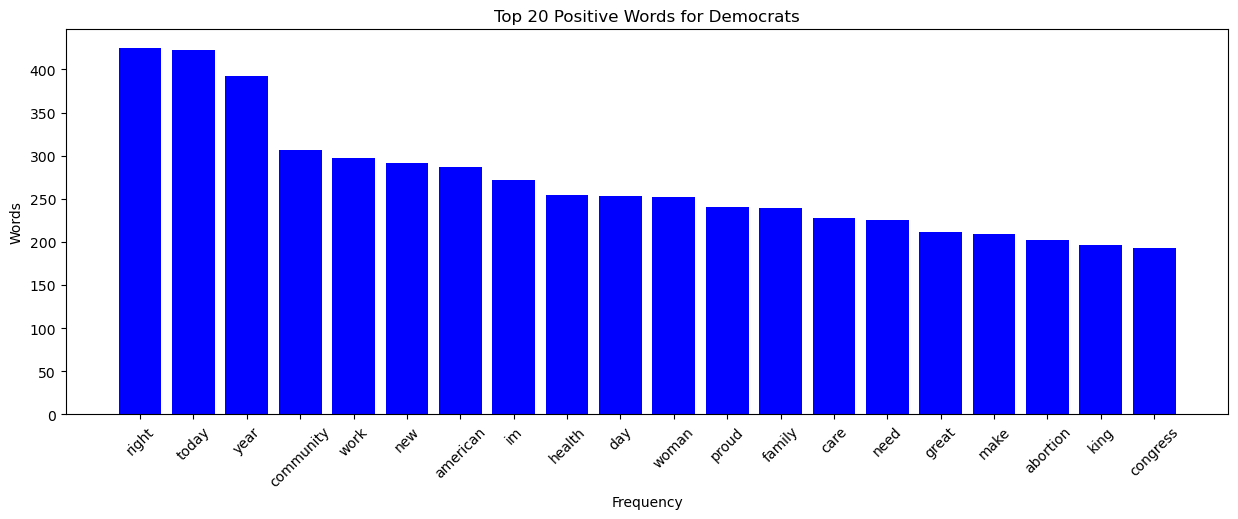

In [123]:
# Plot Top Words for Democrats indicating positive sentiment
plot_top_words(positive_words_dem, "Democrats", "Positive", 'blue')


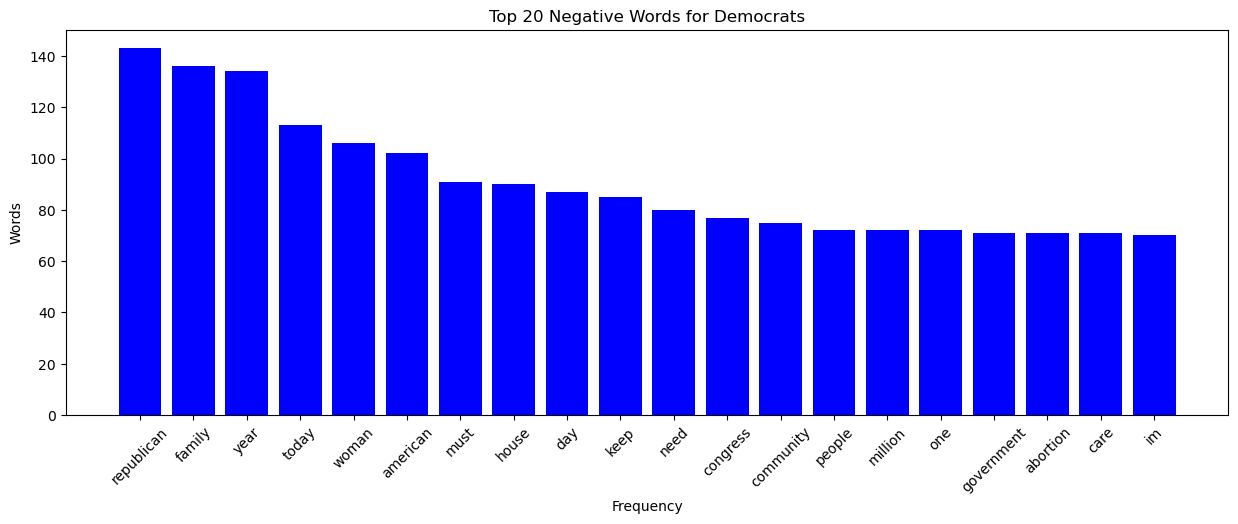

In [124]:
# Plot Top Words for Democrats indicating negaive sentiment
plot_top_words(negative_words_dem, "Democrats", "Negative",'blue')



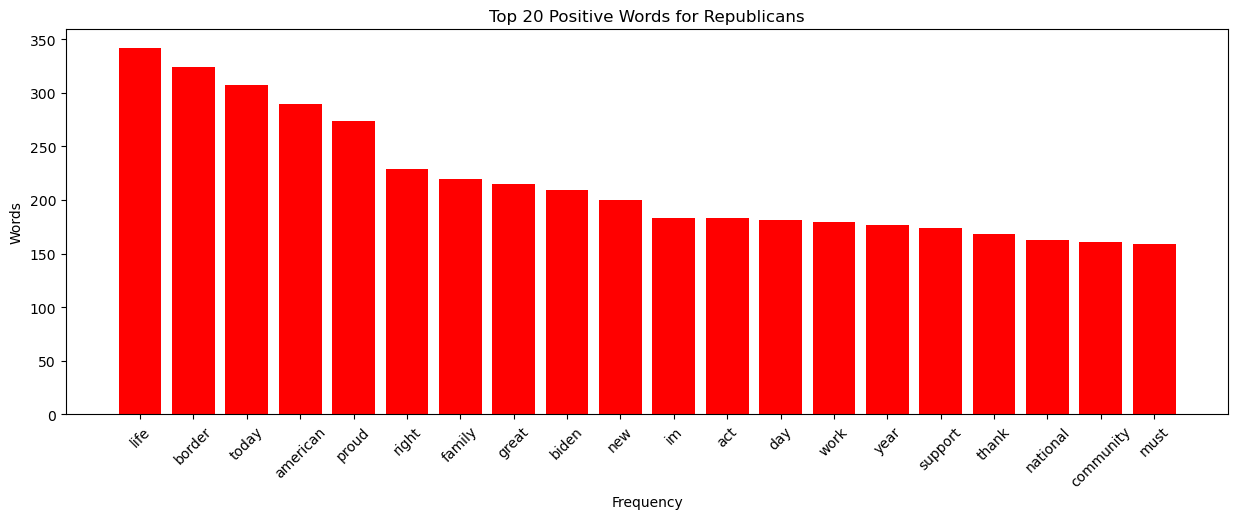

In [125]:
# Plot Top Words for Republicans indicating positive sentiment
plot_top_words(positive_words_rep, "Republicans", "Positive", "red")


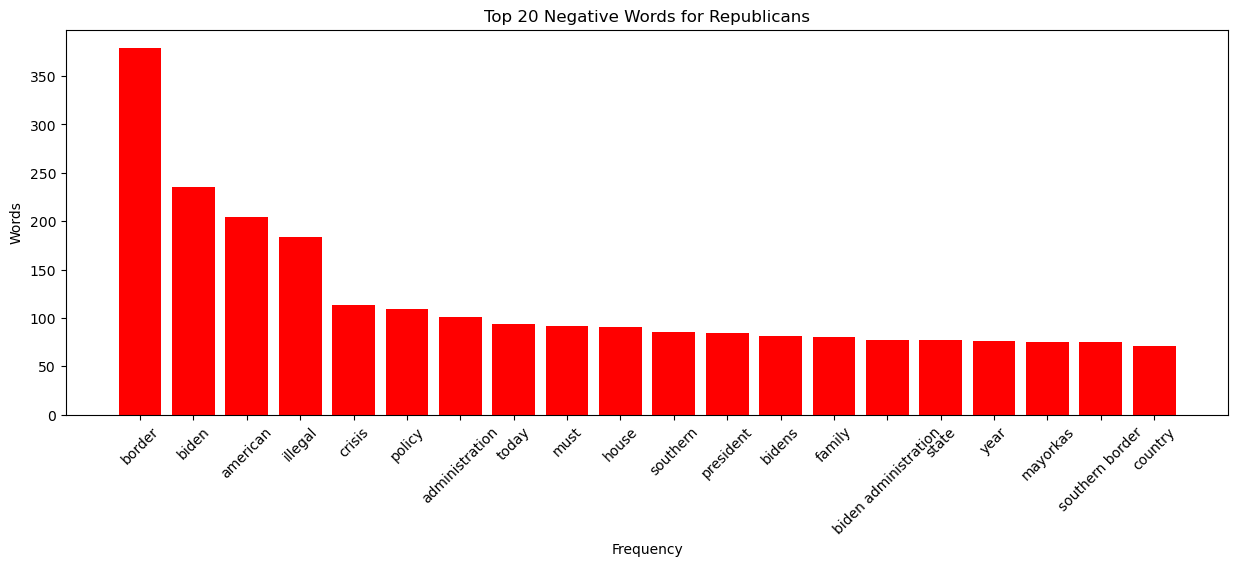

In [126]:
#Plot Top Words for Republicans indicating negative sentiment
plot_top_words(negative_words_rep, "Republicans", "Negative", "red")

#### WordClouds for Positive and Negative Tweets

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already defined the functions average_sentiment_by_party and top_words_by_sentiment

# Word Cloud for Positive Tweets with Party Colors
def generate_combined_word_cloud(positive_tweets_dem, positive_tweets_rep, title):
    combined_text_dem = " ".join(positive_tweets_dem.split())
    combined_text_rep = " ".join(positive_tweets_rep.split())

    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='bwr').generate(combined_text_dem + combined_text_rep)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

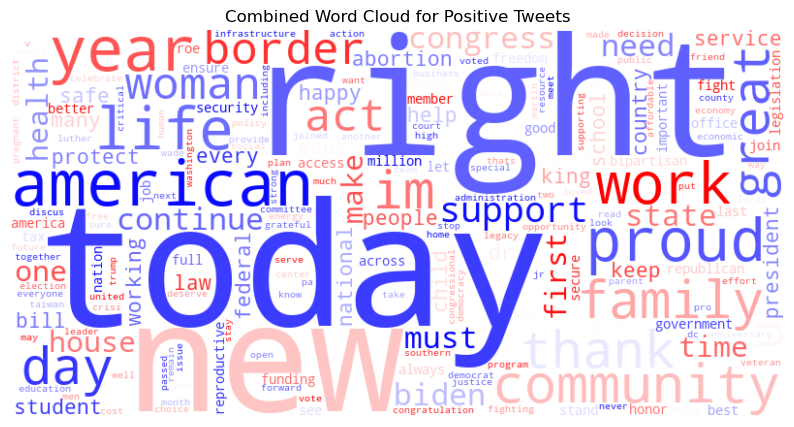

In [128]:
# Combine positive tweets for Democrats and Republicans
positive_tweets_dem = " ".join(df_cleaned[(df_cleaned['is_democrat'] == 1) & (df_cleaned['sentiment'] > 0)]['clean_tweet'])
positive_tweets_rep = " ".join(df_cleaned[(df_cleaned['is_democrat'] == 0) & (df_cleaned['sentiment'] > 0)]['clean_tweet'])

# Generate Combined Word Cloud for Positive Tweets
generate_combined_word_cloud(positive_tweets_dem, positive_tweets_rep, "Combined Word Cloud for Positive Tweets")


In [129]:
# Word Cloud for Negative Tweets with Party Colors
def generate_combined_word_cloud(negative_tweets_dem, negative_tweets_rep, title):
    combined_text_dem = " ".join(negative_tweets_dem.split())
    combined_text_rep = " ".join(negative_tweets_rep.split())

    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='bwr').generate(combined_text_dem + combined_text_rep)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

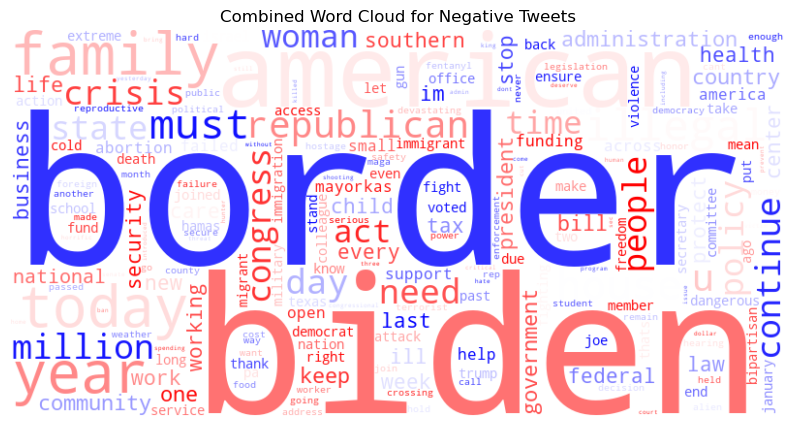

In [130]:
# Combine negative tweets for Democrats and Republicans
negative_tweets_dem = " ".join(df_cleaned[(df_cleaned['is_democrat'] == 1) & (df_cleaned['sentiment'] < 0)]['clean_tweet'])
negative_tweets_rep = " ".join(df_cleaned[(df_cleaned['is_democrat'] == 0) & (df_cleaned['sentiment'] < 0)]['clean_tweet'])

# Generate Combined Word Cloud for Negative Tweets
generate_combined_word_cloud(negative_tweets_dem, negative_tweets_rep, "Combined Word Cloud for Negative Tweets")

## 5. Hypothesis Testing

A t-test will be performed to determine if there are statistically significant differences between the sentiment in the tweets from Democrats and Republicans

In [131]:
import matplotlib.pyplot as plt
from textblob import TextBlob  # Assuming you have already imported TextBlob

The null hypothesis (H0) is that there is no difference in sentiment between Democrats and Republicans. If the p-value is less than 0.05, you can reject the null hypothesis and conclude that there is a statistically significant difference.

In [132]:
from scipy.stats import ttest_ind

# Extract sentiment scores for Democrats and Republicans
dem_sentiment = sentiment.loc[sentiment['party'] == 'D', 'sentiment']
rep_sentiment = sentiment.loc[sentiment['party'] == 'R', 'sentiment']

# Perform t-test
t_statistic, p_value = ttest_ind(dem_sentiment, rep_sentiment, equal_var=False)

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')


T-statistic: 3.167773207390336
P-value: 0.001541032498470403


In [133]:
# Check for statistical significance (common threshold is 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference in sentiment between Democrats and Republicans.")
else:
    print("There is no statistically significant difference in sentiment between Democrats and Republicans.")


There is a statistically significant difference in sentiment between Democrats and Republicans.


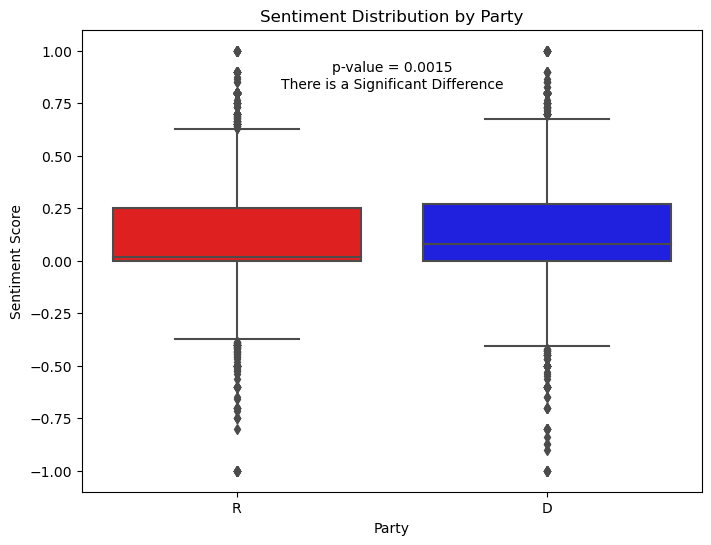

In [136]:
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='party', y='sentiment', data=sentiment, palette=['red', 'blue'])
plt.title('Sentiment Distribution by Party')
plt.xlabel('Party')
plt.ylabel('Sentiment Score')

# Add significance level if p-value is less than 0.05
if p_value < 0.05:
    plt.text(0.5, 0.9, f'p-value = {p_value:.4f}\nThere is a Significant Difference', 
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Project Conclusion

In this exploration of political discourse on social media, the objective was to uncover insights into the dynamics of political discussions. Here's a summary of our key findings:

### **Data Overview**

I independently curated the dataset by personally leveraging the Twitter API V2 for scraping. This hands-on approach ensured meticulous control over the data collection process, allowing for a customized and targeted dataset tailored to the specific requirements of our analysis.

The value of this approach lies in the firsthand understanding and insights gained during the data collection. By personally overseeing the scraping process, I acquired in-depth knowledge about potential biases, nuances, and intricacies within the dataset. This level of involvement enhances the credibility and reliability of our findings, as the data is not only relevant to our research questions but also reflects a conscious and informed collection process.

The dataset comprised political tweets covering diverse topics and sentiments. Through Exploratory Data Analysis (EDA) and Feature Engineering, we introduced a "retweets" column and categorized hashtags into Democrat and Republican lists, providing valuable information for analysis.

### **Interpreting Results and Model Use**

My analysis revealed interesting patterns in hashtag usage, hinting at potential communication styles.I trained models to predict party affiliation, emphasizing the importance of a diverse training set for optimal performance.

### **Vectorizer: Analysis of Top Terms and Hashtags by Party**

I delved into top words and hashtags predicting party affiliations, shedding light on distinctive themes within Democrat and Republican tweets.

### **Model Analysis**

Multiple models were tested, highlighting the significance of choosing a slightly overfitted version for tweet classification due to its adaptability to the unpredictable nature of tweets.

### **Confusion Matrix Results Analysis**

Precision, recall, and F1-score were analyzed, showcasing a reasonable ability of the model to predict Democrat and Republican tweets. However, further refinement or exploration of advanced models is suggested.

### **Sentiment Analysis and Hypothesis Testing**

The sentiment analysis indicated a statistically significant difference in sentiment between Democrats and Republicans, with Democrats exhibiting slightly higher sentiment on average.

### **Conclusion and Implications**

My journey through political tweet analysis provided valuable insights into communication styles, party dynamics, and sentiment differences. The models, though exhibiting areas for improvement, serve as valuable tools for understanding and classifying tweets in the dynamic landscape of social media.

The intersection of language, sentiment, and political affiliation is complex, and my findings contribute to unraveling this complexity. As we navigate the evolving world of political discourse, the adaptability of our tweet classification model positions it as a versatile tool for comprehending the nuances of tweets.

In conclusion, this project exemplifies the power of data analysis in decoding the language of politics on social media, paving the way for deeper understanding and informed discussions.

### Further Steps

1. Streamlit
2. Time-based Analysis: Analyze sentiment trends over time: Collect timestamp of tweets.
3. Topic Modelling